In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob as glob
import os as os
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows',None)

Introduction:<br><br>

Majority of research literature focuses on ecosystem models without forecasting. They generally are either descriptive statistics and other forms of analyses that describe that current state of health.

Primary literature assess the complex interactions between natural and artificial or anthropogenic pressures from the perspective of ecosystem response. Due to the complexity of the interconnecting variables that determine the health of ecosystems, forecasting can be trickier. TBEP is the primary estuarine research and conservation group with multiple affiliations to government and academic institutions. More about their efforts can be found in the Readme file of this repository.

TBEP developed 2 indices, TBBI and TBNI - representing the health of the benthic and nekton components of the Tampa Bay estuarine ecosystem.

The first phase of this study aims to develop another index that approaches ecosystem health from the aspect of anthropogenic factors. As a first iteration, this index will be and aggregate weighted index, leaning on the Passche index framework.

Here, I present the Investigation into the Anthrogenic features, demonstrate through EDA various relationships in the current dataset, introduce basic regression models that characterize features and transformations that ultimately allow for the construction of the weighted index.

The "Nekton" jupyter notebook serves as the main notebook that joins all EDA analyses and base models to the dataset at large and will ultimately be where the weighted model is aggregated.

### Loading Data and Formatting Datasets

In [17]:
"""
Using water quality sampling stations to
"""

'\nUsing water quality sampling stations to\n'

In [18]:
os.chdir('J:/Brainstation/BS Git/data/human Imact')

In [19]:
# Middle Tampa Bay Water Quality
mtbwq=pd.read_csv('MTB_WQ.csv',low_memory=False)

In [20]:
hbwq=pd.read_csv('HB_WTQ.csv',low_memory=False)

In [21]:
# Loading in water quality data
# There are 4-5 water bodies that comprise Tampa Bay.
# These 2 data sets are closest in proximmity to the study site.
# Hillsborough Bay (HB)
# Middle Tampa Bay (MTB)

In [22]:
mtbwq.head(5)

WBodyID     WaterBodyName DataSource        StationID        StationName  \
0    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
1    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
2    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
3    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
4    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   

     Actual_StationID  Actual_Latitude  Actual_Longitude DEP_WBID  \
0  ="274237082325800"        27.710586        -82.549263    1558B   
1  ="274237082325800"        27.710586        -82.549263    1558B   
2  ="274237082325800"        27.710586        -82.549263    1558B   
3  ="274237082325800"        27.710586        -82.549263    1558B   
4  ="274237082325800"        27.710586        -82.549263    1558B   

       SampleDate  ActivityDepth DepthUnits  Parameter  \
0  7/10/1972 0:00            NaN          m     Cl_mgl   
1  7/10/1972 0:00            NaN          m  NH3_N_ugl   
2  7/10/1972 0:00            NaN          m  NH3_N_ugl   
3  7/10/1972 0:00            NaN          m    NO3_ugl   
4  7/10/1972 0:00            NaN          m         pH   

                 Characteristic Sample_Fraction  Result_Value Result_Unit  \
0                      Chloride             NaN       18000.0         NaN   
1        Nitrogen, ammonia as N             NaN         550.0         NaN   
2        Nitrogen, ammonia as N             NaN         580.0         NaN   
3  Nitrogen, Nitrate (NO3) as N             NaN          10.0         NaN   
4                            pH             NaN           8.3         NaN   

  QACode Result_Comment Original_Result_Value Original_Result_Unit  
0    NaN            NaN                 18000                 mg/l  
1    NaN            NaN                  0.55                 mg/l  
2    NaN            NaN                  0.58                 mg/l  
3    NaN            NaN                  0.01                 mg/l  
4    NaN            NaN                   8.3                  NaN

In [23]:
hbwq.head(5)

DataSourceName  DataSourceCode    StationID  \
0  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
1  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
2  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
3  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
4  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   

   ActualStationID  Latitude_DD  Longitude_DD SampleDate SampleTime  \
0              NaN    27.792639    -82.413861  4/25/2006    0:00:00   
1              NaN    27.792639    -82.413861  4/25/2006    0:00:00   
2              NaN    27.792639    -82.413861  4/25/2006    0:00:00   
3              NaN    27.792639    -82.413861  4/25/2006    0:00:00   
4              NaN    27.792639    -82.413861  4/25/2006    0:00:00   

   ActivityDepth ActivityDepthUnit               Characteristic  ResultValue  \
0            0.2                 m                    Fluorides         1.00   
1            0.2                 m               Fecal Coliform        10.00   
2            0.2                 m             Dissolved Solids     27200.00   
3            0.2                 m  Dissolved oxygen saturation        80.80   
4            0.2                 m        Dissolved oxygen (DO)         4.68   

    ResultUnit ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
0         mg/l            NaN           NaN        20005  Hillsborough Bay  
1    cfu/100ml            NaN           NaN        20005  Hillsborough Bay  
2         mg/l            NaN           NaN        20005  Hillsborough Bay  
3  percent (%)            NaN           NaN        20005  Hillsborough Bay  
4         mg/l            NaN           NaN        20005  Hillsborough Bay

In [24]:
mtbwq.isna().sum()

WBodyID                       0
WaterBodyName                 0
DataSource                    0
StationID                     0
StationName                   0
Actual_StationID              0
Actual_Latitude               0
Actual_Longitude              0
DEP_WBID                      0
SampleDate                    0
ActivityDepth             47806
DepthUnits                    0
Parameter                     0
Characteristic             5507
Sample_Fraction          505439
Result_Value                  0
Result_Unit              102440
QACode                   449145
Result_Comment           501969
Original_Result_Value    153389
Original_Result_Unit     167747
dtype: int64

In [25]:
hbwq.isna().sum()

DataSourceName             0
DataSourceCode             0
StationID                  0
ActualStationID      1048575
Latitude_DD                0
Longitude_DD               0
SampleDate                 0
SampleTime                 0
ActivityDepth         766156
ActivityDepthUnit     758436
Characteristic        748461
ResultValue              985
ResultUnit            786325
ValueQualifier       1005190
ResultComment        1035222
WaterbodyID                0
WaterbodyName              0
dtype: int64

In [26]:
mtbwq.Actual_Latitude
mtbwq.columns[[6,7]]

Index(['Actual_Latitude', 'Actual_Longitude'], dtype='object')

In [27]:
# Standardizing some columns between these 2 datasets

In [28]:
hbwq.rename(columns={'Latitude_DD':'Latitude','Longitude_DD':'Longitude'},inplace=True)
hbwq.head(5)

DataSourceName  DataSourceCode    StationID  \
0  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
1  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
2  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
3  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
4  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   

   ActualStationID   Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
0              NaN  27.792639 -82.413861  4/25/2006    0:00:00            0.2   
1              NaN  27.792639 -82.413861  4/25/2006    0:00:00            0.2   
2              NaN  27.792639 -82.413861  4/25/2006    0:00:00            0.2   
3              NaN  27.792639 -82.413861  4/25/2006    0:00:00            0.2   
4              NaN  27.792639 -82.413861  4/25/2006    0:00:00            0.2   

  ActivityDepthUnit               Characteristic  ResultValue   ResultUnit  \
0                 m                    Fluorides         1.00         mg/l   
1                 m               Fecal Coliform        10.00    cfu/100ml   
2                 m             Dissolved Solids     27200.00         mg/l   
3                 m  Dissolved oxygen saturation        80.80  percent (%)   
4                 m        Dissolved oxygen (DO)         4.68         mg/l   

  ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
0            NaN           NaN        20005  Hillsborough Bay  
1            NaN           NaN        20005  Hillsborough Bay  
2            NaN           NaN        20005  Hillsborough Bay  
3            NaN           NaN        20005  Hillsborough Bay  
4            NaN           NaN        20005  Hillsborough Bay

In [29]:
# Standardizing some columns between these 2 datasets

In [30]:
mtbwq.rename(columns={'Actual_Latitude':'Latitude','Actual_Longitude':'Longitude'},inplace=True)
mtbwq.head(5)

WBodyID     WaterBodyName DataSource        StationID        StationName  \
0    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
1    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
2    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
3    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
4    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   

     Actual_StationID   Latitude  Longitude DEP_WBID      SampleDate  \
0  ="274237082325800"  27.710586 -82.549263    1558B  7/10/1972 0:00   
1  ="274237082325800"  27.710586 -82.549263    1558B  7/10/1972 0:00   
2  ="274237082325800"  27.710586 -82.549263    1558B  7/10/1972 0:00   
3  ="274237082325800"  27.710586 -82.549263    1558B  7/10/1972 0:00   
4  ="274237082325800"  27.710586 -82.549263    1558B  7/10/1972 0:00   

   ActivityDepth DepthUnits  Parameter                Characteristic  \
0            NaN          m     Cl_mgl                      Chloride   
1            NaN          m  NH3_N_ugl        Nitrogen, ammonia as N   
2            NaN          m  NH3_N_ugl        Nitrogen, ammonia as N   
3            NaN          m    NO3_ugl  Nitrogen, Nitrate (NO3) as N   
4            NaN          m         pH                            pH   

  Sample_Fraction  Result_Value Result_Unit QACode Result_Comment  \
0             NaN       18000.0         NaN    NaN            NaN   
1             NaN         550.0         NaN    NaN            NaN   
2             NaN         580.0         NaN    NaN            NaN   
3             NaN          10.0         NaN    NaN            NaN   
4             NaN           8.3         NaN    NaN            NaN   

  Original_Result_Value Original_Result_Unit  
0                 18000                 mg/l  
1                  0.55                 mg/l  
2                  0.58                 mg/l  
3                  0.01                 mg/l  
4                   8.3                  NaN

In [31]:
hbwq.Characteristic.value_counts()

Characteristic
Temperature, water                               45421
Salinity                                         33622
Specific conductance                             31115
Dissolved oxygen (DO)                            30145
pH                                               29934
                                                 ...  
Manganese                                            2
Nickel                                               2
Zinc                                                 2
Nitrogen, Nitrite (NO2) as N                         2
Anatoxin (toxin produced by blue green algae)        1
Name: count, Length: 61, dtype: int64

** This study uses Organic and Inorganic forms of nitrogen and phosphorous as a proxy for anthropogenic introduction of harmful chemicals into the bay. This study examines these 2 features in 2 main ways:<br>
- As an aggregate statistic that describes the functioning of the bay at large
- The  ratio of organic to inorganic  compounds that describe that extent of anthropogenic and ultimately harmful versions of these compounds introduced.

In [32]:
# looking specifically for the forms of Nitrogen.
# Nitrogen comes in Nitrogen Organic, Nitrogen, Nitrates, Nitrites, Ammonia, Ammonium

# HBWQ - Hillsborough Bay Water Quality
# MTBWQ - Middle Tampa Bay Water Quality

index_1=hbwq.Characteristic.str.contains('Nit,nit').index==True

In [33]:
len(index_1)

1048575

In [34]:
Nit=hbwq.Characteristic.str.contains('Nitrogen')

In [35]:
Nit.head()

0    False
1    False
2    False
3    False
4    False
Name: Characteristic, dtype: object

In [36]:
pho_hb=hbwq.Characteristic.str.contains('Phosph')

In [37]:
hbwq[pho_hb==True]

DataSourceName          DataSourceCode  \
21       FDEP Southwest Regional Operations Center          STORET_21FLTPA   
22       FDEP Southwest Regional Operations Center          STORET_21FLTPA   
84       FDEP Southwest Regional Operations Center          STORET_21FLTPA   
85       FDEP Southwest Regional Operations Center          STORET_21FLTPA   
162      FDEP Southwest Regional Operations Center          STORET_21FLTPA   
...                                            ...                     ...   
1014898         Quarterly Routine Water Monitoring           EPC_QUARTERLY   
1014901         Quarterly Routine Water Monitoring           EPC_QUARTERLY   
1014904       EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING   
1014909       EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING   
1014911       EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING   

           StationID  ActualStationID   Latitude  Longitude  SampleDate  \
21       2.74734E+14              NaN  27.792639 -82.413861   10/3/2006   
22       2.74734E+14              NaN  27.792639 -82.413861   10/3/2006   
84       2.74734E+14              NaN  27.792639 -82.413861  10/10/2006   
85       2.74734E+14              NaN  27.792639 -82.413861  10/10/2006   
162      2.74734E+14              NaN  27.792639 -82.413861   11/7/2006   
...              ...              ...        ...        ...         ...   
1014898          594              NaN  27.819233 -82.382517   10/5/2010   
1014901          594              NaN  27.819233 -82.382517   10/5/2010   
1014904            2              NaN  27.940800 -82.457901   2/10/2015   
1014909            2              NaN  27.940800 -82.457901   2/13/2001   
1014911            2              NaN  27.940800 -82.457901  12/12/2017   

        SampleTime  ActivityDepth ActivityDepthUnit  \
21         0:00:00            0.2                 m   
22         0:00:00            0.2                 m   
84         0:00:00            0.2                 m   
85         0:00:00            0.2                 m   
162        0:00:00            0.2                 m   
...            ...            ...               ...   
1014898   11:51:00            0.5                 m   
1014901   11:51:00            0.5                 m   
1014904    0:00:00            0.5                 m   
1014909    9:09:00            1.4                 m   
1014911    0:00:00            0.5                 m   

                           Characteristic  ResultValue ResultUnit  \
21                        Phosphorus as P    280.00000       ug/l   
22       Phosphorus, phosphate (PO4) as P      0.20000       mg/l   
84                        Phosphorus as P    230.00000       ug/l   
85       Phosphorus, phosphate (PO4) as P      0.17000       mg/l   
162                       Phosphorus as P    170.00000       ug/l   
...                                   ...          ...        ...   
1014898  Phosphorus, phosphate (PO4) as P      0.16800       mg/l   
1014901                   Phosphorus as P    340.99999       ug/l   
1014904                   Phosphorus as P      0.11700       mg/l   
1014909                   Phosphorus as P      0.12000       mg/l   
1014911                   Phosphorus as P      0.16600       mg/l   

        ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
21                 NaN           NaN        20005  Hillsborough Bay  
22                 NaN           NaN        20005  Hillsborough Bay  
84                 NaN           NaN        20005  Hillsborough Bay  
85                 NaN           NaN        20005  Hillsborough Bay  
162                NaN           NaN        20005  Hillsborough Bay  
...                ...           ...          ...               ...  
1014898            NaN           NaN        20005  Hillsborough Bay  
1014901            NaN           NaN        20005  Hillsborough Bay  
1014904              J           NaN        20005  Hillsborough Bay  
1014909 

### EDA

#### WQI Sample Frequency, Consistency Check

In [38]:
hbwq.SampleDate.str.slice(-4).value_counts().reset_index().sort_values(by='SampleDate')

SampleDate   count
29       1990    5554
27       1991    6780
22       1992   10118
25       1993    7243
30       1994    5342
28       1995    5786
33       1996    4647
34       1997    4210
32       1998    4774
31       1999    5241
26       2000    7240
24       2001    8175
20       2002   11832
14       2003   16191
12       2004   17539
16       2005   14191
18       2006   13397
21       2007   10974
13       2008   17388
8        2009   44686
6        2010   46000
7        2011   45450
5        2012   62884
3        2013   84322
4        2014   72862
2        2015  101276
0        2016  142721
1        2017  139705
9        2018   33339
10       2019   30042
11       2020   17624
15       2021   15681
19       2022   12091
17       2023   13790
23       2024    9480

In [39]:
hbwq.SampleDate=pd.to_datetime(hbwq.SampleDate)

In [40]:
mtbwq.SampleDate=pd.to_datetime(mtbwq.SampleDate)

In [41]:
hbwq.head(3)

DataSourceName  DataSourceCode    StationID  \
0  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
1  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
2  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   

   ActualStationID   Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
0              NaN  27.792639 -82.413861 2006-04-25    0:00:00            0.2   
1              NaN  27.792639 -82.413861 2006-04-25    0:00:00            0.2   
2              NaN  27.792639 -82.413861 2006-04-25    0:00:00            0.2   

  ActivityDepthUnit    Characteristic  ResultValue ResultUnit ValueQualifier  \
0                 m         Fluorides          1.0       mg/l            NaN   
1                 m    Fecal Coliform         10.0  cfu/100ml            NaN   
2                 m  Dissolved Solids      27200.0       mg/l            NaN   

  ResultComment  WaterbodyID     WaterbodyName  
0           NaN        20005  Hillsborough Bay  
1           NaN        20005  Hillsborough Bay  
2           NaN        20005  Hillsborough Bay

In [42]:
mtbwq.head(3)

WBodyID     WaterBodyName DataSource        StationID        StationName  \
0    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
1    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
2    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   

     Actual_StationID   Latitude  Longitude DEP_WBID SampleDate  \
0  ="274237082325800"  27.710586 -82.549263    1558B 1972-07-10   
1  ="274237082325800"  27.710586 -82.549263    1558B 1972-07-10   
2  ="274237082325800"  27.710586 -82.549263    1558B 1972-07-10   

   ActivityDepth DepthUnits  Parameter          Characteristic  \
0            NaN          m     Cl_mgl                Chloride   
1            NaN          m  NH3_N_ugl  Nitrogen, ammonia as N   
2            NaN          m  NH3_N_ugl  Nitrogen, ammonia as N   

  Sample_Fraction  Result_Value Result_Unit QACode Result_Comment  \
0             NaN       18000.0         NaN    NaN            NaN   
1             NaN         550.0         NaN    NaN            NaN   
2             NaN         580.0         NaN    NaN            NaN   

  Original_Result_Value Original_Result_Unit  
0                 18000                 mg/l  
1                  0.55                 mg/l  
2                  0.58                 mg/l

    SampleDate  count
10           1    419
9            2    439
6            3    462
11           4    346
0            5    530
7            6    455
8            7    450
2            8    499
1            9    500
5           10    481
3           11    491
4           12    482


array([[<Axes: title={'center': 'SampleDate'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

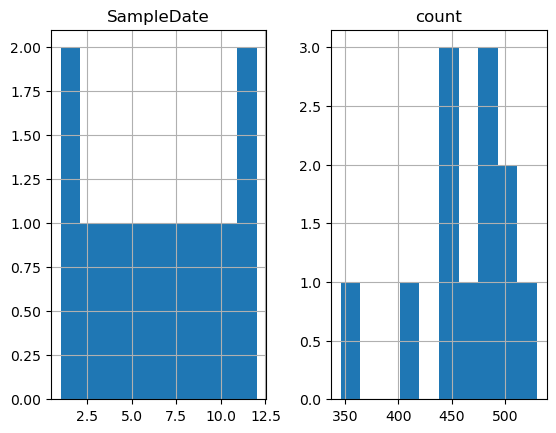

In [43]:
#Look at sample counts over time.
print(hbwq[hbwq.SampleDate.dt.year==1990].SampleDate.dt.month.value_counts().reset_index().sort_values(by='SampleDate'))
hbwq[hbwq.SampleDate.dt.year==1990].SampleDate.dt.month.value_counts().reset_index().sort_values(by='SampleDate').hist()

    SampleDate  count
6            1    795
7            2    791
9            3    766
10           4    718
2            5    827
4            6    805
8            7    786
1            8    886
3            9    809
0           10    981
11          11    658
5           12    803


array([[<Axes: title={'center': 'SampleDate'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

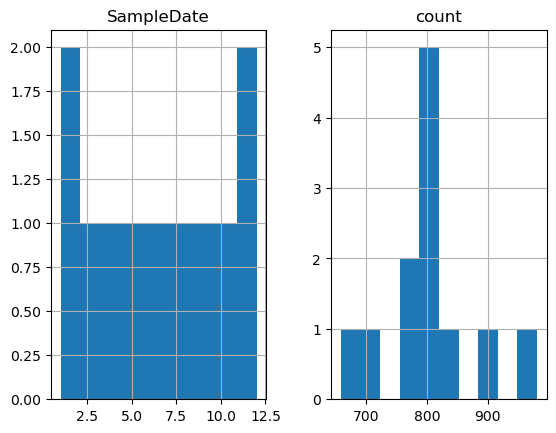

In [44]:
# Checking for distribution of sample counts by month
print(mtbwq[mtbwq.SampleDate.dt.year==1990].SampleDate.dt.month.value_counts().reset_index().sort_values(by='SampleDate'))
mtbwq[mtbwq.SampleDate.dt.year==1990].SampleDate.dt.month.value_counts().reset_index().sort_values(by='SampleDate').hist()

#### Preliminary EDA and processing of subset, 1990

In [45]:
mtbwq1990=mtbwq[mtbwq.SampleDate.dt.year==1990]

In [46]:
mtbwq1990[mtbwq1990.SampleDate.dt.month==1].sort_values(by='SampleDate')

WBodyID     WaterBodyName              DataSource StationID  \
510825    20007  Middle Tampa Bay                HCEPC_WQ        32   
130386    20007  Middle Tampa Bay                HCEPC_WQ        33   
130385    20007  Middle Tampa Bay                HCEPC_WQ        33   
130384    20007  Middle Tampa Bay                HCEPC_WQ        33   
130383    20007  Middle Tampa Bay                HCEPC_WQ        33   
...         ...               ...                     ...       ...   
82437     20007  Middle Tampa Bay  EPC_ROUTINE_MONITORING       136   
82438     20007  Middle Tampa Bay  EPC_ROUTINE_MONITORING       136   
82439     20007  Middle Tampa Bay  EPC_ROUTINE_MONITORING       136   
82427     20007  Middle Tampa Bay  EPC_ROUTINE_MONITORING       136   
82414     20007  Middle Tampa Bay  EPC_ROUTINE_MONITORING       136   

                 StationName Actual_StationID  Latitude  Longitude DEP_WBID  \
510825   Tampa Bay Marker 5G            ="32"   27.7931 -82.570600    1558C   
130386   Lower Old Tampa Bay            ="33"   27.8261 -82.567500    1558C   
130385   Lower Old Tampa Bay            ="33"   27.8261 -82.567500    1558C   
130384   Lower Old Tampa Bay            ="33"   27.8261 -82.567500    1558C   
130383   Lower Old Tampa Bay            ="33"   27.8261 -82.567500    1558C   
...                      ...              ...       ...        ...      ...   
82437          Cockroach Bay           ="136"   27.6800 -82.499199     1778   
82438          Cockroach Bay           ="136"   27.6800 -82.499199     1778   
82439          Cockroach Bay           ="136"   27.6800 -82.499199     1778   
82427          Cockroach Bay           ="136"   27.6800 -82.499199     1778   
82414          Cockroach Bay           ="136"   27.6800 -82.499199     1778   

                SampleDate  ActivityDepth DepthUnits    Parameter  \
510825 1990-01-03 00:00:00           3.20          m  Cond_umhocm   
130386 1990-01-03 00:00:00           4.42          m     Turb_ntu   
130385 1990-01-03 00:00:00           4.42          m  Tcoli_100ml   
130384 1990-01-03 00:00:00           4.42          m      TKN_ugl   
130383 1990-01-03 00:00:00           4.42          m  Fcoli_100ml   
...                    ...            ...        ...          ...   
82437  1990-01-31 11:12:00           0.30          m       TP_mgl   
82438  1990-01-31 11:12:00           0.30          m      TKN_mgl   
82439  1990-01-31 11:12:00           0.30          m       TN_mgl   
82427  1990-01-31 11:12:00           0.30          m     norg_ugl   
82414  1990-01-31 11:12:00            NaN          m      TempA_F   

              Characteristic Sample_Fraction  Result_Value Result_Unit QACode  \
510825  Specific conductance             NaN      45300.00        umho    NaN   
130386             Turbidity             NaN          3.00         NTU    NaN   
130385        Total Coliform             NaN          4.00   cfu/100ml    NaN   
130384    Nitrogen, Kjeldahl             NaN        680.00        ug/l    NaN   
130383        Fecal Coliform             NaN          4.00   cfu/100ml    NaN   
...                      ...             ...           ...         ...    ...   
82437        Phosphorus as P             NaN          0.52        mg/l    NaN   
82438     Nitrogen, Kjeldahl             NaN          1.31        mg/l    NaN   
82439               Nitrogen             NaN          1.38        mg/l      C   
82427      Nitrogen, organic             NaN       1270.00        ug/l      C   
82414       Temperature, air             NaN         71.60       deg F    NaN   

       Result_Comment Original_Result_Value Original_Result_Unit  
510825            NaN                   NaN                  NaN  
130386            NaN                   NaN                  NaN  
130385            NaN                   NaN                  NaN  
130384            NaN                   NaN                  NaN  
130383            NaN                   NaN                  NaN  
..

In [47]:
hbwq1990=hbwq[hbwq.SampleDate.dt.year==1990]

In [48]:
mtbwq.SampleDate=pd.to_datetime(mtbwq.SampleDate)

In [49]:
hbwq.SampleDate=pd.to_datetime(hbwq.SampleDate)

In [50]:
hbwq1990_samplefreq=hbwq1990.SampleDate.value_counts().reset_index().sort_values(by='SampleDate').reset_index(drop=True)

<Axes: >

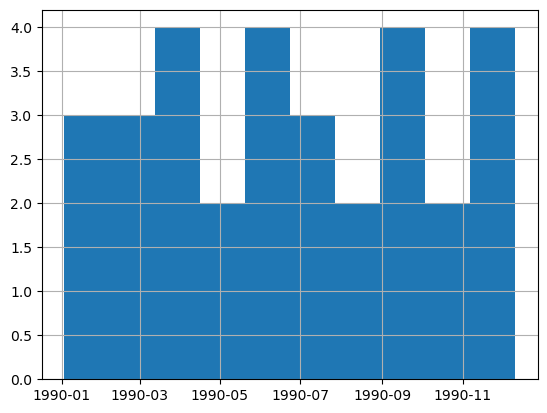

In [51]:
hbwq1990_samplefreq.SampleDate.hist()

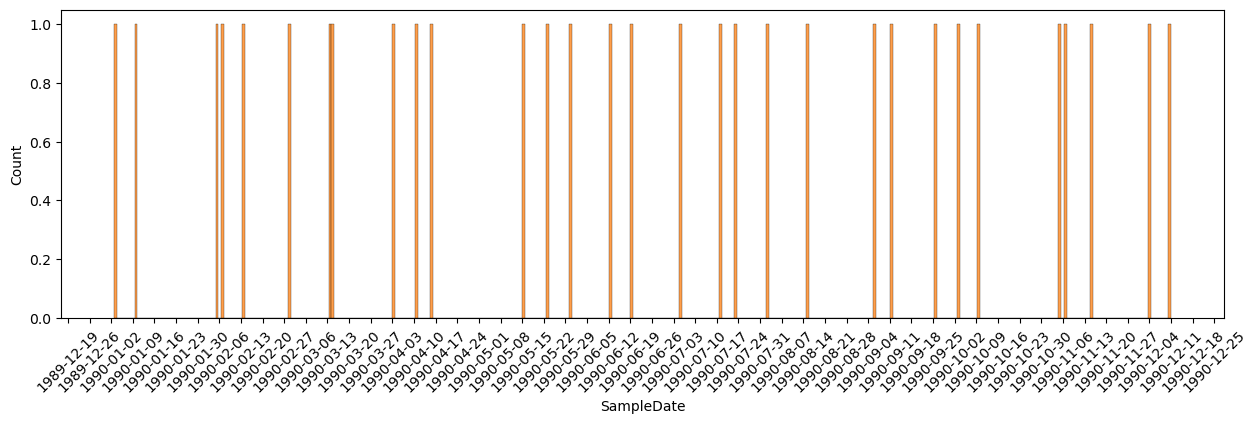

In [52]:
import matplotlib.dates as mdates

plt.figure(figsize=(15,4))
sns.histplot()
ax = sns.histplot(x=hbwq1990_samplefreq.SampleDate,bins=365)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
#plt.xticks(range('1990-01-01','1990-12-31', 365))
plt.show()

In [53]:
hbwq1990

DataSourceName DataSourceCode    StationID  \
22449                   EPC Water Quality Data       HCEPC_WQ           55   
22450                   EPC Water Quality Data       HCEPC_WQ           55   
22453                   EPC Water Quality Data       HCEPC_WQ           55   
22455                   EPC Water Quality Data       HCEPC_WQ           55   
22457                   EPC Water Quality Data       HCEPC_WQ           55   
...                                        ...            ...          ...   
938257  USGS National Water Information System      USGS_NWIS  2.75134E+14   
938295  USGS National Water Information System      USGS_NWIS  2.75134E+14   
938296  USGS National Water Information System      USGS_NWIS  2.75134E+14   
938346  USGS National Water Information System      USGS_NWIS  2.75134E+14   
938347  USGS National Water Information System      USGS_NWIS  2.75134E+14   

        ActualStationID   Latitude  Longitude SampleDate SampleTime  \
22449               NaN  27.849166 -82.431385 1990-01-10    0:00:00   
22450               NaN  27.849166 -82.431385 1990-02-14    0:00:00   
22453               NaN  27.849166 -82.431385 1990-03-14    0:00:00   
22455               NaN  27.849166 -82.431385 1990-04-11    0:00:00   
22457               NaN  27.849166 -82.431385 1990-05-16    0:00:00   
...                 ...        ...        ...        ...        ...   
938257              NaN  27.859747 -82.451205 1990-05-31    0:00:00   
938295              NaN  27.859747 -82.451205 1990-08-15    0:00:00   
938296              NaN  27.859747 -82.451205 1990-08-15    0:00:00   
938346              NaN  27.859747 -82.451205 1990-02-07    0:00:00   
938347              NaN  27.859747 -82.451205 1990-06-19    0:00:00   

        ActivityDepth ActivityDepthUnit  \
22449            2.23               m     
22450            2.44               m     
22453            2.59               m     
22455            2.59               m     
22457            2.59               m     
...               ...               ...   
938257            NaN               NaN   
938295            NaN               NaN   
938296            NaN               NaN   
938346            NaN               NaN   
938347            NaN               NaN   

                                      Characteristic  ResultValue ResultUnit  \
22449                                 Fecal Coliform         4.00  cfu/100ml   
22450                                 Fecal Coliform         4.00  cfu/100ml   
22453                                 Fecal Coliform         8.00  cfu/100ml   
22455                                 Fecal Coliform         4.00  cfu/100ml   
22457                                 Fecal Coliform         4.00  cfu/100ml   
...                                              ...          ...        ...   
938257                               Phosphorus as P         0.55       mg/l   
938295                            Nitrogen, Kjeldahl         0.77       mg/l   
938296                            Nitrogen, Kjeldahl         0.75       mg/l   
938346  Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N         0.04       mg/l   
938347  Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N         0.02       mg/l   

       ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
22449             NaN           NaN        20005  Hillsborough Bay  
22450             NaN           NaN        20005  Hillsborough Bay  
22453             NaN           NaN        20005  Hillsborough Bay  
22455             NaN           NaN        20005  Hillsborough Bay  
22457             NaN           NaN        20005  Hillsborough Bay  
...               ...           ...          ...               ...  
938257            NaN           NaN        20005  Hillsborough Bay  
938295            NaN           NaN        20005  Hillsborough Bay  
938296            NaN           NaN        20005  Hillsborough Bay  
938346            NaN           NaN        20005  Hillsborough Bay  
93834

In [54]:
# Isolate Nitrates
nitrogen_1990=hbwq1990[hbwq1990.Characteristic.str.contains('Nitr','nitr')==True]
nitrogen_1990.head(5)

DataSourceName DataSourceCode StationID  ActualStationID  \
22768  EPC Water Quality Data       HCEPC_WQ        55              NaN   
22769  EPC Water Quality Data       HCEPC_WQ        55              NaN   
22770  EPC Water Quality Data       HCEPC_WQ        55              NaN   
22771  EPC Water Quality Data       HCEPC_WQ        55              NaN   
22772  EPC Water Quality Data       HCEPC_WQ        55              NaN   

        Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
22768  27.849166 -82.431385 1990-01-10    0:00:00           2.23   
22769  27.849166 -82.431385 1990-02-14    0:00:00           2.44   
22770  27.849166 -82.431385 1990-03-14    0:00:00           2.59   
22771  27.849166 -82.431385 1990-04-11    0:00:00           2.59   
22772  27.849166 -82.431385 1990-05-16    0:00:00           2.59   

      ActivityDepthUnit Characteristic  ResultValue ResultUnit ValueQualifier  \
22768               m         Nitrogen        930.0       ug/l            NaN   
22769               m         Nitrogen       1120.0       ug/l            NaN   
22770               m         Nitrogen        720.0       ug/l            NaN   
22771               m         Nitrogen        610.0       ug/l            NaN   
22772               m         Nitrogen        940.0       ug/l            NaN   

      ResultComment  WaterbodyID     WaterbodyName  
22768           NaN        20005  Hillsborough Bay  
22769           NaN        20005  Hillsborough Bay  
22770           NaN        20005  Hillsborough Bay  
22771           NaN        20005  Hillsborough Bay  
22772           NaN        20005  Hillsborough Bay

#### Isolation of Compounds

The dataset has multiple entries for each sample event. The same sample is analyzed and described in multiple ways. Consequently, data needs to be isolated to get a consistent single data set.

In [55]:
phosphate_hb=hbwq[hbwq.Characteristic.str.contains('Phos','phos')==True]
phosphate_hb.SampleDate=pd.to_datetime(phosphate_hb.SampleDate)
phosphate_hb.head(2)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_55644\4096948815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phosphate_hb.SampleDate=pd.to_datetime(phosphate_hb.SampleDate)


DataSourceName  DataSourceCode    StationID  \
21  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
22  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   

    ActualStationID   Latitude  Longitude SampleDate SampleTime  \
21              NaN  27.792639 -82.413861 2006-10-03    0:00:00   
22              NaN  27.792639 -82.413861 2006-10-03    0:00:00   

    ActivityDepth ActivityDepthUnit                    Characteristic  \
21            0.2                 m                   Phosphorus as P   
22            0.2                 m  Phosphorus, phosphate (PO4) as P   

    ResultValue ResultUnit ValueQualifier ResultComment  WaterbodyID  \
21        280.0       ug/l            NaN           NaN        20005   
22          0.2       mg/l            NaN           NaN        20005   

       WaterbodyName  
21  Hillsborough Bay  
22  Hillsborough Bay

In [56]:
phosphate_hb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16091 entries, 21 to 1014911
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DataSourceName     16091 non-null  object        
 1   DataSourceCode     16091 non-null  object        
 2   StationID          16091 non-null  object        
 3   ActualStationID    0 non-null      float64       
 4   Latitude           16091 non-null  float64       
 5   Longitude          16091 non-null  float64       
 6   SampleDate         16091 non-null  datetime64[ns]
 7   SampleTime         16091 non-null  object        
 8   ActivityDepth      14639 non-null  float64       
 9   ActivityDepthUnit  14633 non-null  object        
 10  Characteristic     16091 non-null  object        
 11  ResultValue        16087 non-null  float64       
 12  ResultUnit         15536 non-null  object        
 13  ValueQualifier     1327 non-null   object        
 14  ResultCo

In [57]:
#Isolate Phosphate
phosphate_1990=hbwq1990[hbwq1990.Characteristic.str.contains('Phos','phos')==True]
phosphate_1990.head(5)

DataSourceName DataSourceCode StationID  ActualStationID  \
23711  EPC Water Quality Data       HCEPC_WQ        44              NaN   
25728  EPC Water Quality Data       HCEPC_WQ        44              NaN   
25729  EPC Water Quality Data       HCEPC_WQ        44              NaN   
25764  EPC Water Quality Data       HCEPC_WQ        55              NaN   
25849  EPC Water Quality Data       HCEPC_WQ         6              NaN   

        Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
23711  27.923609 -82.480832 1990-12-11    0:00:00           0.91   
25728  27.923609 -82.480832 1990-06-13    0:00:00           1.07   
25729  27.923609 -82.480832 1990-10-10    0:00:00           0.91   
25764  27.849166 -82.431385 1990-09-12    0:00:00           2.44   
25849  27.889443 -82.477497 1990-02-14    0:00:00           1.52   

      ActivityDepthUnit                    Characteristic  ResultValue  \
23711               m    Phosphorus, phosphate (PO4) as P         0.30   
25728               m                     Phosphorus as P         0.65   
25729               m                     Phosphorus as P         0.42   
25764               m                     Phosphorus as P         0.63   
25849               m                     Phosphorus as P         0.52   

      ResultUnit ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
23711       mg/l            NaN           NaN        20005  Hillsborough Bay  
25728       mg/l            NaN           NaN        20005  Hillsborough Bay  
25729       mg/l            NaN           NaN        20005  Hillsborough Bay  
25764       mg/l            NaN           NaN        20005  Hillsborough Bay  
25849       mg/l            NaN           NaN        20005  Hillsborough Bay

In [58]:
pd.concat([nitrogen_1990.Characteristic.value_counts(),nitrogen_1990.ResultUnit.value_counts()],axis=1)

count  count
Nitrogen, Kjeldahl                            362.0    NaN
Nitrogen                                      349.0    NaN
Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N  338.0    NaN
Nitrogen, ammonia as N                        319.0    NaN
Nitrogen, organic                             311.0    NaN
Nitrogen, Nitrate (NO3) as N                   14.0    NaN
mg/l                                            NaN  831.0
ug/l                                            NaN  699.0

##### Phosphates

In [59]:
# Full HB dataset: phosphate_hb

In [60]:
phosphate_hb.ResultUnit.value_counts()

ResultUnit
mg/l    10431
ug/l     5105
Name: count, dtype: int64

In [61]:
phosphate_hb_PO4=phosphate_hb[phosphate_hb.Characteristic.str.contains('PO4')]

In [62]:
phosphate_hb_PO4.ResultUnit.value_counts()

ResultUnit
mg/l    4719
Name: count, dtype: int64

In [63]:
phosphorous_hb_P=phosphate_hb[phosphate_hb.Characteristic== 'Phosphorus as P']

In [64]:
phosphorous_hb_P.ResultUnit.value_counts()

ResultUnit
mg/l    5712
ug/l    5105
Name: count, dtype: int64

In [65]:
phosphorous_hb_P_mg=phosphorous_hb_P[phosphorous_hb_P.ResultUnit=='mg/l']

In [66]:
phosphorous_hb_P_ug=phosphorous_hb_P[phosphorous_hb_P.ResultUnit=='ug/l']

In [67]:
phosphorous_hb_P_mg.head(3)

DataSourceName DataSourceCode StationID  ActualStationID  \
25674  EPC Water Quality Data       HCEPC_WQ        44              NaN   
25675  EPC Water Quality Data       HCEPC_WQ        44              NaN   
25694  EPC Water Quality Data       HCEPC_WQ        71              NaN   

        Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
25674  27.923609 -82.480832 1993-11-09    0:00:00           1.07   
25675  27.923609 -82.480832 1994-10-11    0:00:00           0.91   
25694  27.876387 -82.413883 2005-05-10   14:48:00           4.92   

      ActivityDepthUnit   Characteristic  ResultValue ResultUnit  \
25674               m    Phosphorus as P         0.32       mg/l   
25675               m    Phosphorus as P         0.50       mg/l   
25694               M    Phosphorus as P         0.27       mg/l   

      ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
25674            NaN           NaN        20005  Hillsborough Bay  
25675            NaN           NaN        20005  Hillsborough Bay  
25694            NaN           NaN        20005  Hillsborough Bay

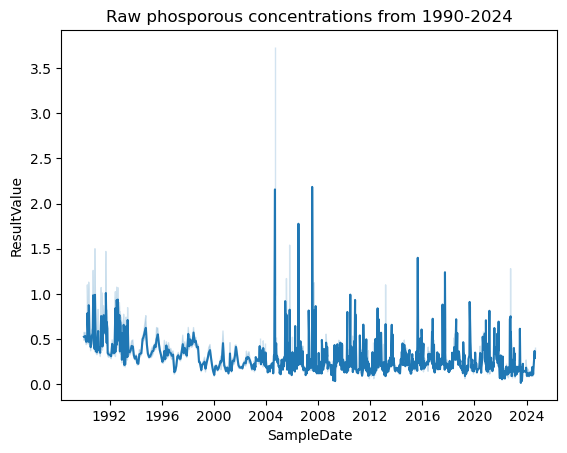

In [70]:
sns.lineplot(x='SampleDate',y='ResultValue',data=phosphorous_hb_P_mg)
plt.title('Raw phosporous concentrations from 1990-2024')
plt.show()

In [71]:
# Formatting df as needed
phosphorous_hb_P_mg['month']=phosphorous_hb_P_mg.SampleDate.dt.month

In [72]:
phosphorous_hb_P_mg['year']=phosphorous_hb_P_mg.SampleDate.dt.year

In [73]:
phosphorous_hb_P_mg=phosphorous_hb_P_mg.sort_values(by='SampleDate')

In [74]:
# Getting aggregate statistics to describe larger relationships
P_mean=phosphorous_hb_P_mg.groupby(['year','month','ResultUnit']).ResultValue.mean().reset_index()

In [75]:
# Getting plottable Year-Month format X-axis
P_mean['ym']=P_mean.year.astype(str)+'_'+P_mean.month.astype(str)

Text(0, 0.5, 'Phosphorous Concentration (mg/L)')

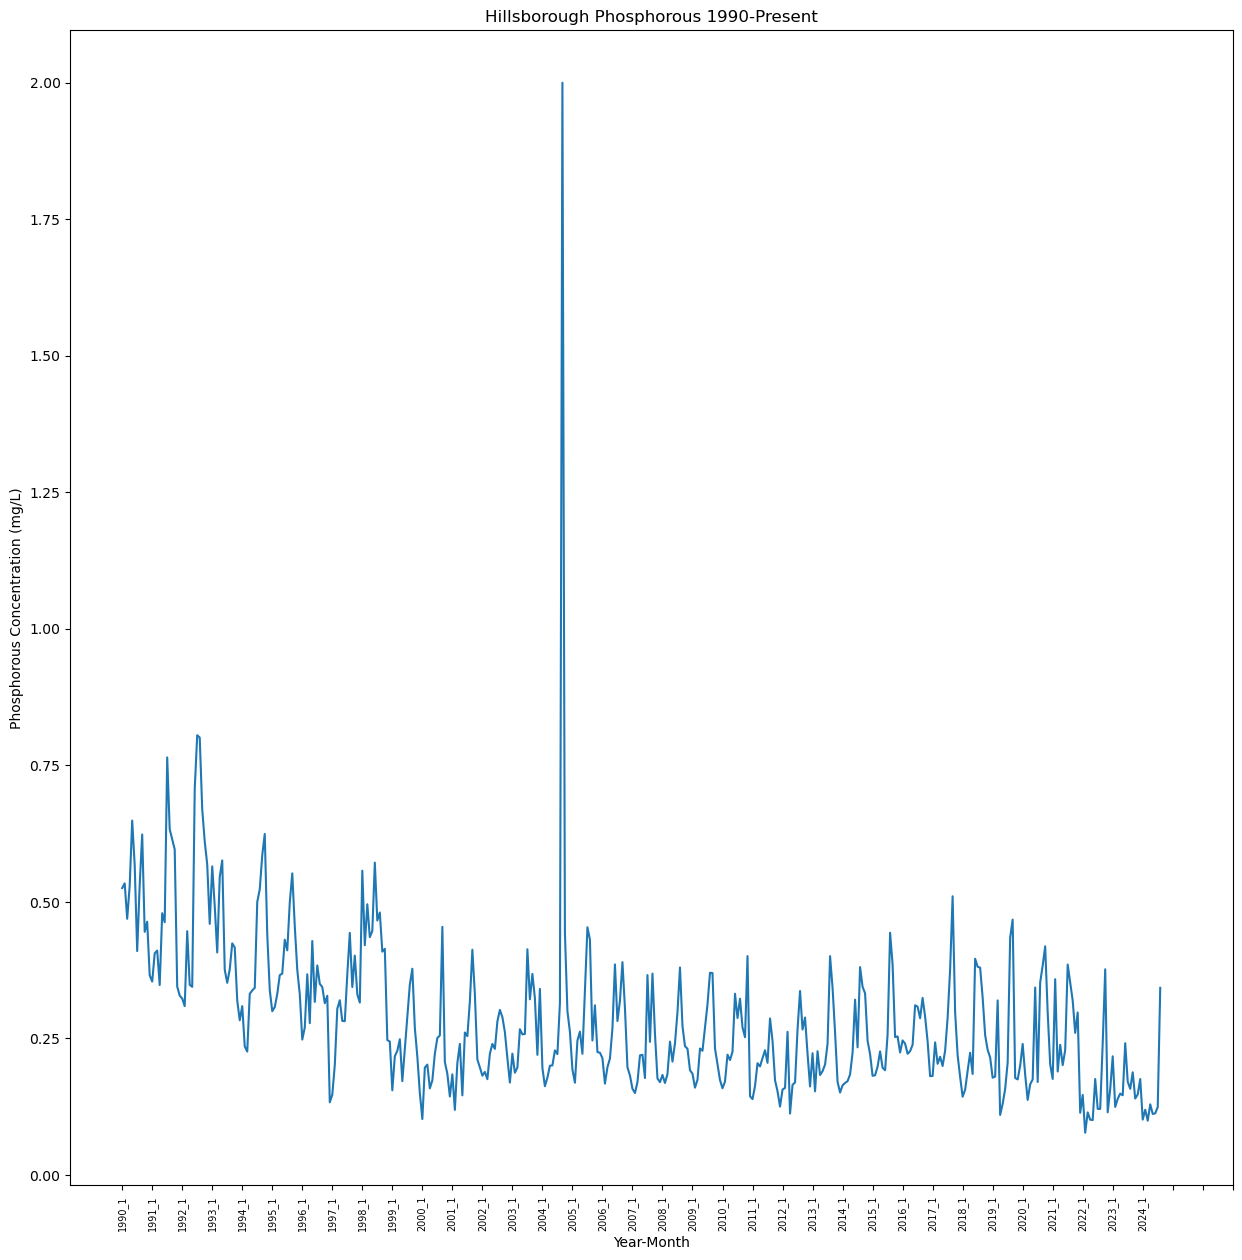

In [76]:
plt.figure(figsize=(15,15))
sns.lineplot(x='ym',y='ResultValue',data=P_mean)
plt.title('Hillsborough Phosphorous 1990-Present')
plt.xlabel('Year-Month')
plt.xticks(rotation=90,fontsize='x-small')
plt.xticks(np.arange(0,450,step=12))
plt.ylabel('Phosphorous Concentration (mg/L)')

In [77]:
sns.lineplot(x='month',y='ResultValue',data=PO4_mean)

NameError: name 'PO4_mean' is not defined

##### Nitrogen

In [78]:
nitrates=hbwq[hbwq.Characteristic.isin(['Nitrogen','Nitrite','ammonia','Nitrate'])]

In [79]:
hbwq.isna().sum()

DataSourceName             0
DataSourceCode             0
StationID                  0
ActualStationID      1048575
Latitude                   0
Longitude                  0
SampleDate                 0
SampleTime                 0
ActivityDepth         766156
ActivityDepthUnit     758436
Characteristic        748461
ResultValue              985
ResultUnit            786325
ValueQualifier       1005190
ResultComment        1035222
WaterbodyID                0
WaterbodyName              0
dtype: int64

In [80]:
#These columns have too many missing data points - and are not useful for this iteration. They cannot be imputed
# or do not add value
hb_wq_nit_iso=hbwq.drop(columns=hbwq.columns[[3,14,13,6,15]])

In [81]:
hb_wq_nit_iso.Characteristic=hb_wq_nit_iso.Characteristic.str.lower()

Isolate columns of interest.

In [82]:
"""
Key Nitrogen columns:
[16
,17
,18
,43
,45
,57
,60
61]
"""

"""
Key Phosphorous columns:
21
22


"""

'\nKey Phosphorous columns:\n21\n22\n\n\n'

In [83]:
hb_wq_nit_iso.Characteristic = hb_wq_nit_iso.Characteristic.str.lower()

In [84]:
# Need to look at all the variables/compounds classified in the column and dataset. Notably, the forms of nitrogen
counter=0
for x in hb_wq_nit_iso.Characteristic.unique():
    print(f'Col: {counter}: {x}')
    counter+=1

Col: 0: fluorides
Col: 1: fecal coliform
Col: 2: dissolved solids
Col: 3: dissolved oxygen saturation
Col: 4: dissolved oxygen (do)
Col: 5: depth
Col: 6: chlorophyll a, corrected for pheophytin
Col: 7: chloride
Col: 8: calcium
Col: 9: bod, biochemical oxygen demand
Col: 10: apparent color
Col: 11: alkalinity, carbonate as caco3
Col: 12: turbidity
Col: 13: total suspended solids (tss)
Col: 14: total organic carbon (toc)
Col: 15: magnesium
Col: 16: nitrogen, ammonia as n
Col: 17: nitrogen, kjeldahl
Col: 18: nitrogen, nitrite (no2) + nitrate (no3) as n
Col: 19: ph
Col: 20: pheophytin-a
Col: 21: phosphorus as p
Col: 22: phosphorus, phosphate (po4) as p
Col: 23: potassium
Col: 24: salinity
Col: 25: secchi disk depth
Col: 26: sodium
Col: 27: specific conductance
Col: 28: sulfur, sulfate (so4) as so4
Col: 29: bod, carbonaceous
Col: 30: temperature, water
Col: 31: total coliform
Col: 32: chlorophyll a, uncorrected for pheophytin
Col: 33: depth, bottom
Col: 34: true color
Col: 35: cloud cover
C

In [85]:
hb_wq_nit_iso.isna().sum()

DataSourceName            0
DataSourceCode            0
StationID                 0
Latitude                  0
Longitude                 0
SampleTime                0
ActivityDepth        766156
ActivityDepthUnit    758436
Characteristic       748461
ResultValue             985
ResultUnit           786325
WaterbodyName             0
dtype: int64

In [86]:
unique_n=hb_wq_nit_iso.Characteristic.unique()
counter=0
for x in unique_n:
    print(f'Characteristic [{counter}]: {x}')
    counter+=1

Characteristic [0]: fluorides
Characteristic [1]: fecal coliform
Characteristic [2]: dissolved solids
Characteristic [3]: dissolved oxygen saturation
Characteristic [4]: dissolved oxygen (do)
Characteristic [5]: depth
Characteristic [6]: chlorophyll a, corrected for pheophytin
Characteristic [7]: chloride
Characteristic [8]: calcium
Characteristic [9]: bod, biochemical oxygen demand
Characteristic [10]: apparent color
Characteristic [11]: alkalinity, carbonate as caco3
Characteristic [12]: turbidity
Characteristic [13]: total suspended solids (tss)
Characteristic [14]: total organic carbon (toc)
Characteristic [15]: magnesium
Characteristic [16]: nitrogen, ammonia as n
Characteristic [17]: nitrogen, kjeldahl
Characteristic [18]: nitrogen, nitrite (no2) + nitrate (no3) as n
Characteristic [19]: ph
Characteristic [20]: pheophytin-a
Characteristic [21]: phosphorus as p
Characteristic [22]: phosphorus, phosphate (po4) as p
Characteristic [23]: potassium
Characteristic [24]: salinity
Charac

In [87]:
hbwq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   DataSourceName     1048575 non-null  object        
 1   DataSourceCode     1048575 non-null  object        
 2   StationID          1048575 non-null  object        
 3   ActualStationID    0 non-null        float64       
 4   Latitude           1048575 non-null  float64       
 5   Longitude          1048575 non-null  float64       
 6   SampleDate         1048575 non-null  datetime64[ns]
 7   SampleTime         1048575 non-null  object        
 8   ActivityDepth      282419 non-null   float64       
 9   ActivityDepthUnit  290139 non-null   object        
 10  Characteristic     300114 non-null   object        
 11  ResultValue        1047590 non-null  float64       
 12  ResultUnit         262250 non-null   object        
 13  ValueQualifier     43385 no

In [88]:
hbwq[hbwq.Characteristic.str.contains('Nitr' or 'nitr' or 'Amm' or 'amm')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
nitrates.to_csv('nitrates_hb')

** Getting values for nitrates from Middle Tampa Bay **

In [91]:
# First pass at isolating data of interest
mtb_nitrates=mtbwq[mtbwq.Characteristic.isin(['Nitrogen','Nitrite','ammonia','Nitrate'])]

In [92]:
mtb_nitrates

WBodyID     WaterBodyName    DataSource        StationID  \
8         20007  Middle Tampa Bay     USGS_NWIS  274237082325800   
23        20007  Middle Tampa Bay     USGS_NWIS  274237082325800   
1242      20007  Middle Tampa Bay  WIN_21FLHILL               11   
1243      20007  Middle Tampa Bay  WIN_21FLHILL               11   
1244      20007  Middle Tampa Bay  WIN_21FLHILL               11   
...         ...               ...           ...              ...   
544152    20007  Middle Tampa Bay      PINELLAS               E6   
544184    20007  Middle Tampa Bay      PINELLAS               E6   
544185    20007  Middle Tampa Bay      PINELLAS               E6   
544255    20007  Middle Tampa Bay    WIN_21FLGW            59865   
544256    20007  Middle Tampa Bay    WIN_21FLGW            59865   

                                  StationName    Actual_StationID   Latitude  \
8                            10F TAMPA BAY 11  ="274237082325800"  27.710586   
23                           10F TAMPA BAY 11  ="274237082325800"  27.710586   
1242                                       11               ="11"  27.812901   
1243                                       11               ="11"  27.812901   
1244                                       11               ="11"  27.812901   
...                                       ...                 ...        ...   
544152   Weedon Island South Area/Shore Acres        ="E6-C-12-8"  27.811150   
544184   Weedon Island South Area/Shore Acres        ="E6-A-12-8"  27.791200   
544185   Weedon Island South Area/Shore Acres        ="E6-A-12-8"  27.791200   
544255              Z4-CN-16003 UNNAMED CANAL            ="59865"  27.758901   
544256              Z4-CN-16003 UNNAMED CANAL            ="59865"  27.758901   

        Longitude DEP_WBID          SampleDate  ActivityDepth DepthUnits  \
8      -82.549263    1558B 1972-07-10 00:00:00            NaN          m   
23     -82.549263    1558B 1972-07-10 00:00:00            NaN          m   
1242   -82.478897    1558C 2020-02-11 00:00:00           0.90          m   
1243   -82.478897    1558C 2020-02-11 00:00:00           0.90          m   
1244   -82.478897    1558C 2020-06-09 00:00:00           1.35          m   
...           ...      ...                 ...            ...        ...   
544152 -82.594590    1558C 2012-12-05 11:11:00           0.22          m   
544184 -82.607350    1558C 2012-12-05 11:56:00           0.21          m   
544185 -82.607350    1558C 2012-12-05 11:56:00           0.21          m   
544255 -82.428693    1725B 2022-01-19 00:00:00           0.30          m   
544256 -82.428693    1725B 2022-01-19 00:00:00           0.30          m   

       Parameter Characteristic Sample_Fraction  Result_Value Result_Unit  \
8         TN_ugl       Nitrogen             NaN       460.000        ug/l   
23        TN_mgl       Nitrogen             NaN         0.460        mg/l   
1242      TN_ugl       Nitrogen           Total       339.000        ug/l   
1243      TN_mgl       Nitrogen           Total         0.339        mg/l   
1244      TN_mgl       Nitrogen           Total         0.238        mg/l   
...          ...            ...             ...           ...         ...   
544152    TN_mgl       Nitrogen             NaN         0.260        mg/l   
544184    TN_ugl       Nitrogen             NaN       340.000        ug/l   
544185    TN_mgl       Nitrogen             NaN         0.340        mg/l   
544255    TN_ugl       Nitrogen           Total       945.000        ug/l   
544256    TN_mgl       Nitrogen           Total         0.945        mg/l   

       QACode                         Result_Comment Original_Result_Value  \
8         NaN                                    NaN                   NaN   
23        NaN                                    NaN                   NaN   
1242      NaN  Water Institute Calculated: TKN + NOx                   NaN   
1243      NaN  Water Institute Calculated: TKN + NOx                   NaN   
12

##### Combining Nit/Phos

In [97]:
nitrates_total=pd.read_csv('nitrates_hb.csv')

In [98]:
nitrates_total=nitrates_total[nitrates_total.ResultUnit=='ug/l']

In [99]:
mtb_nitrates.to_csv('nitrates_mtb2.csv')

In [106]:
#columns of interest
#here solely for reference
"""
hbwq['WaterbodyName','Latitude','Longitutude','SampleDate','Characteristic','ResultValue','Result','ActivityDepth','ActivityDepthUnit']
"""

"\nhbwq['WaterbodyName','Latitude','Longitutude','SampleDate','Characteristic','ResultValue','Result','ActivityDepth','ActivityDepthUnit']\n"

In [107]:
pwd

'J:\\Brainstation\\BS Git\\data\\human Imact'

In [108]:
nitrates=pd.read_csv('nitrates.csv')

In [109]:
# Reformat Dates
nitrates.SampleDate=pd.to_datetime(nitrates.SampleDate)

In [110]:
# Extract Month-Year
nitrates['month']=nitrates.SampleDate.dt.month
nitrates['year']=nitrates.SampleDate.dt.year

# Standardize units to mg for comparison scale with Phosphates
nitrates.ResultValue2=nitrates.ResultValue/1000
nitrates.ResultUnit2='mg/l'

In [111]:
nitrates.head(5)

Unnamed: 0 DataSourceCode StationID   Latitude  Longitude SampleDate  \
0       33671      USGS_NWIS       NaN  27.710030 -82.546763 1971-06-01   
1       33675      USGS_NWIS       NaN  27.807804 -82.453983 1971-06-01   
2       34903      USGS_NWIS       NaN  27.758639 -82.508984 1971-06-01   
3       34948      USGS_NWIS       NaN  27.666421 -82.557597 1971-06-01   
4       34899      USGS_NWIS       NaN  27.824192 -82.580653 1971-06-02   

  SampleTime  ActivityDepth ActivityDepthUnit Characteristic  ResultValue  \
0        NaN            NaN                 m       Nitrogen        780.0   
1        NaN            NaN                 m       Nitrogen       1010.0   
2        NaN            NaN                 m       Nitrogen        710.0   
3        NaN            NaN                 m       Nitrogen        960.0   
4        NaN            NaN                 m       Nitrogen        690.0   

  ResultUnit  ResultValue2 ResultUnit2     WaterbodyName  month  year  
0       ug/l          0.78        mg/l  Middle Tampa Bay      6  1971  
1       ug/l          1.01        mg/l  Middle Tampa Bay      6  1971  
2       ug/l          0.71        mg/l  Middle Tampa Bay      6  1971  
3       ug/l          0.96        mg/l  Middle Tampa Bay      6  1971  
4       ug/l          0.69        mg/l  Middle Tampa Bay      6  1971

In [112]:
# Getting plottable Year-Month format X-axis
nitrates['ym']=nitrates.year.astype(str)+'_'+nitrates.month.astype(str)

In [113]:
nitrates

Unnamed: 0 DataSourceCode StationID   Latitude  Longitude SampleDate  \
0           33671      USGS_NWIS       NaN  27.710030 -82.546763 1971-06-01   
1           33675      USGS_NWIS       NaN  27.807804 -82.453983 1971-06-01   
2           34903      USGS_NWIS       NaN  27.758639 -82.508984 1971-06-01   
3           34948      USGS_NWIS       NaN  27.666421 -82.557597 1971-06-01   
4           34899      USGS_NWIS       NaN  27.824192 -82.580653 1971-06-02   
...           ...            ...       ...        ...        ...        ...   
17010       11000   WIN_21FLHILL       NaN  27.662500 -82.563904 2024-08-21   
17011       11202   WIN_21FLHILL       NaN  27.708401 -82.609200 2024-08-21   
17012       11610   WIN_21FLHILL       NaN  27.751101 -82.571800 2024-08-21   
17013       11712   WIN_21FLHILL       NaN  27.729000 -82.498703 2024-08-21   
17014       11100   WIN_21FLHILL       NaN  27.682529 -82.496771 2024-08-28   

      SampleTime  ActivityDepth ActivityDepthUnit Characteristic  ResultValue  \
0            NaN            NaN                 m       Nitrogen        780.0   
1            NaN            NaN                 m       Nitrogen       1010.0   
2            NaN            NaN                 m       Nitrogen        710.0   
3            NaN            NaN                 m       Nitrogen        960.0   
4            NaN            NaN                 m       Nitrogen        690.0   
...          ...            ...               ...            ...          ...   
17010        NaN           2.57                 m       Nitrogen        158.0   
17011        NaN           3.25                 m       Nitrogen        158.0   
17012        NaN           2.11                 m       Nitrogen        213.0   
17013        NaN           0.97                 m       Nitrogen        163.0   
17014        NaN           0.44                 m       Nitrogen        334.0   

      ResultUnit  ResultValue2 ResultUnit2     WaterbodyName  month  year  \
0           ug/l         0.780        mg/l  Middle Tampa Bay      6  1971   
1           ug/l         1.010        mg/l  Middle Tampa Bay      6  1971   
2           ug/l         0.710        mg/l  Middle Tampa Bay      6  1971   
3           ug/l         0.960        mg/l  Middle Tampa Bay      6  1971   
4           ug/l         0.690        mg/l  Middle Tampa Bay      6  1971   
...          ...           ...         ...               ...    ...   ...   
17010       ug/l         0.158        mg/l  Middle Tampa Bay      8  2024   
17011       ug/l         0.158        mg/l  Middle Tampa Bay      8  2024   
17012       ug/l         0.213        mg/l  Middle Tampa Bay      8  2024   
17013       ug/l         0.163        mg/l  Middle Tampa Bay      8  2024   
17014       ug/l         0.334        mg/l  Middle Tampa Bay      8  2024   

           ym  
0      1971_6  
1      1971_6  
2      1971_6  
3      1971_6  
4      1971_6  
...       ...  
17010  2024_8  
17011  2024_8  
17012  2024_8  
17013  2024_8  
17014  2024_8  

[17015 rows x 18 columns]

In [114]:
# Getting rid of unusable columns
# Columns also don't add any value.
nitrates.isna().sum()
nitrates.drop(columns=['StationID','SampleTime'],inplace=True)
nitrates.drop(columns=nitrates.columns[0],inplace=True)

In [115]:
nMTB=nitrates[nitrates.WaterbodyName=='Middle Tampa Bay']

In [116]:
nHB=nitrates[nitrates.WaterbodyName=='Hillsborough Bay']

In [117]:
nitrates=nitrates[nitrates.year>1989]
nitrates.head(5)

DataSourceCode   Latitude  Longitude SampleDate  ActivityDepth  \
3451                HCEPC_WQ  27.826100 -82.567500 1990-01-03           4.42   
3452  EPC_ROUTINE_MONITORING  27.826099 -82.567497 1990-01-03           4.40   
3453  EPC_ROUTINE_MONITORING  27.793200 -82.570701 1990-01-03           3.20   
3454  EPC_ROUTINE_MONITORING  27.811800 -82.523201 1990-01-03           1.80   
3455                HCEPC_WQ  27.811700 -82.523100 1990-01-03           1.83   

     ActivityDepthUnit Characteristic  ResultValue ResultUnit  ResultValue2  \
3451                 m       Nitrogen        690.0       ug/l          0.69   
3452                 m       Nitrogen        690.0       ug/l          0.69   
3453                 m       Nitrogen        550.0       ug/l          0.55   
3454                 m       Nitrogen        540.0       ug/l          0.54   
3455                 m       Nitrogen        540.0       ug/l          0.54   

     ResultUnit2     WaterbodyName  month  year      ym  
3451        mg/l  Middle Tampa Bay      1  1990  1990_1  
3452        mg/l  Middle Tampa Bay      1  1990  1990_1  
3453        mg/l  Middle Tampa Bay      1  1990  1990_1  
3454        mg/l  Middle Tampa Bay      1  1990  1990_1  
3455        mg/l  Middle Tampa Bay      1  1990  1990_1

In [118]:
N_means=nitrates.groupby(['year','month','ym'])[['ResultValue2','ActivityDepth','Latitude','Longitude']].mean().reset_index()

In [119]:
N_means.shape

(416, 7)

In [120]:
P_mean.shape

(416, 5)

In [121]:

P_mean.rename(columns={'ResultValue':'Phos',
                      'year':'pyear',
                      'month':'pmonth',
                      'ResultUnit':'pResultUnit',
                      'ym':'p_ym'
                      },inplace=True)

In [122]:
P_mean.head(3)

pyear  pmonth pResultUnit      Phos    p_ym
0   1990       1        mg/l  0.525385  1990_1
1   1990       2        mg/l  0.534000  1990_2
2   1990       3        mg/l  0.469091  1990_3

In [123]:
print(P_mean.shape)
print(N_means.shape)

(416, 5)
(416, 7)


Creating joined tables for both Nitrogen and Phosphate values. Values have been aggregated and averaged, standardized to a monthly average

In [124]:
NP_means=pd.concat([N_means,P_mean],axis=1)

In [125]:
# check for consistency
(NP_means.ym==NP_means.p_ym).value_counts()

True    416
Name: count, dtype: int64

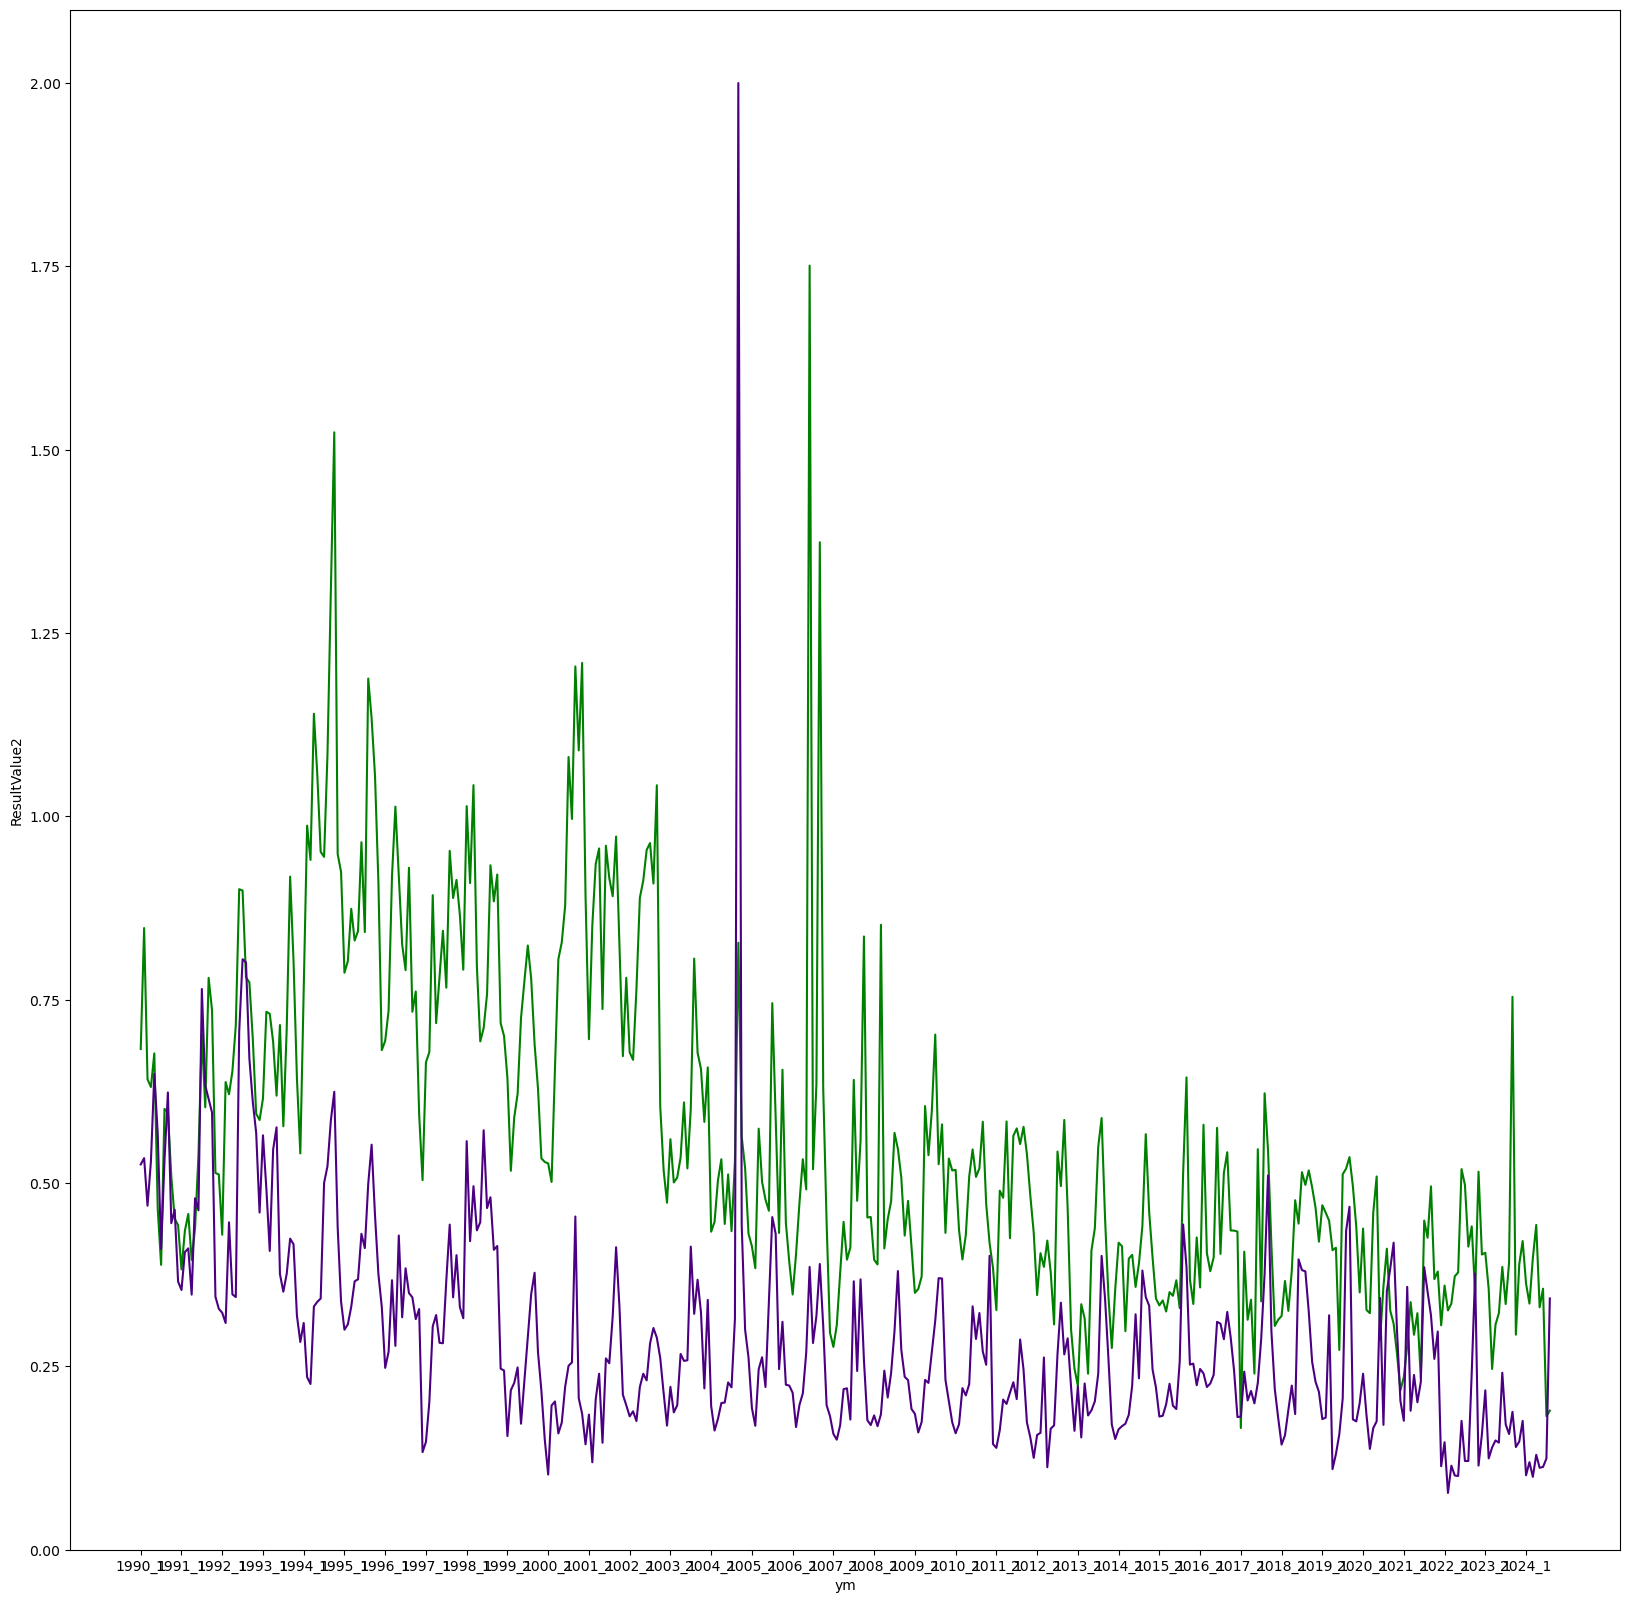

In [126]:
fig, ax = plt.subplots(figsize=(20,20))
#plt.figure(figsize=(15,15))
sns.lineplot(x='ym',y='ResultValue2',data=NP_means,ax=ax,color='green')
#ax1=ax.twinx()
sns.lineplot(x='ym',y='Phos',data=NP_means,color='indigo')
#plt.xticks(rotation=,fontsize='x-small')
plt.xticks(np.arange(0,420, step = 12))
plt.ylim(0,2.1)
plt.show()

There is a definite relationship between the two variables and they both exhibit seasonality; however, intepreting them with respect to the other features may prove more difficult

In [127]:
pwd

'J:\\Brainstation\\BS Git\\data\\human Imact'

In [128]:
NP_means.to_csv('nitrate_phosphate_totals_1990_2024.csv')

<Axes: xlabel='ym', ylabel='Count'>

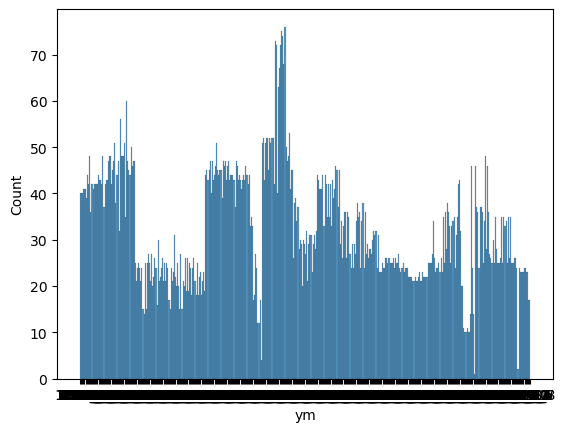

In [129]:
#plt.subplot(111)
sns.histplot(nitrates[nitrates.year>1989].ym)
#plt.subplot(313)


<Axes: xlabel='ym', ylabel='Count'>

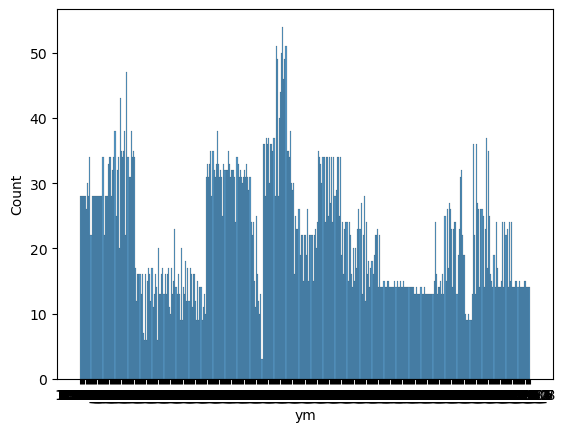

In [130]:
sns.histplot(nMTB[nMTB.year>1989].ym)

<Axes: xlabel='ym', ylabel='Count'>

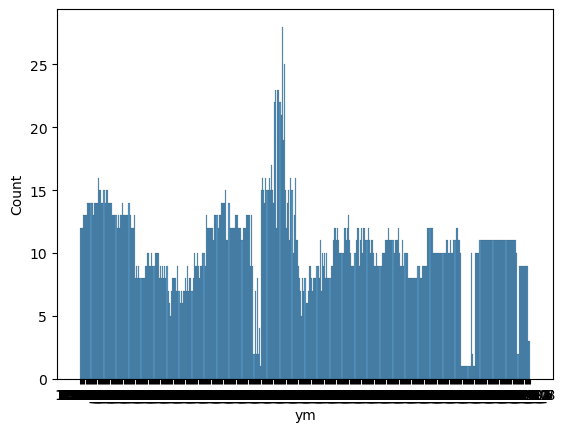

In [131]:
sns.histplot(nHB[nHB.year>1989].ym)

In [132]:
nitrates.WaterbodyName.value_counts()

WaterbodyName
Middle Tampa Bay    9194
Hillsborough Bay    4370
Name: count, dtype: int64

In [133]:
nitrates.groupby(['year','month','ym'])[['ActivityDepth','ResultValue2']].mean().reset_index()

year  month      ym  ActivityDepth  ResultValue2
0    1990      1  1990_1       2.319250      0.682750
1    1990      2  1990_2       2.451250      0.847750
2    1990      3  1990_3       2.362000      0.641500
3    1990      4  1990_4       2.224878      0.630976
4    1990      5  1990_5       2.543902      0.676829
..    ...    ...     ...            ...           ...
411  2024      4  2024_4       2.052083      0.442958
412  2024      5  2024_5       2.039130      0.330565
413  2024      6  2024_6       2.219565      0.355957
414  2024      7  2024_7       2.494118      0.182000
415  2024      8  2024_8       2.612353      0.189706

[416 rows x 5 columns]

SOME literature suggested this approach as a consequence of poor performance of other models; however, this may be a rather irrelevant test

__** This test was ultimately disregarded. Exported CSVs were imported in the NEKTON notebook for further processing **__

### Development 99.206KM COASTLINE NOT INCLUDING WATERWAYS

Here is the introduction of construction, real estate and development influences on the bay.
It is difficult to retrieve consisten data for land usage, development and coastal construction, due to privacy rights, hidden data and more.

Possible methods:
- Aerial, geospatial analysis. Land use, development can be assessed through aerial imagery taken over time. With scale, images can be sectioned and assessed. This requires a great deal of effort to utilize specific geospatial data. This form  of investigation is covered by another notebook.
- Examination of land usage is a component but *can* require extensive work so it is being included here.
- Construction. Looking at permits, construction dates and even sales can inform development rates.

Based on data availability, this study chose to look at the construction date of individual parcels of land in coastal regions.

A critical concept to note is an understanding of how to describe coastal development and the underlying concepts, particularly in an estuarine system. Coastal contsruction should be evaluated by development around watersheds that feed into the main body of water. These have an equal weighted influence on anthropogenic pressures on the local marine ecosystem.

Data Description:

The CSVs read in below cover sections of the coastline and specifically attributes of individual plots of land. The primary features of interest are
- Property Acreage
- Year Built
- Number of structures built
- Land type
- Total square footage of structure

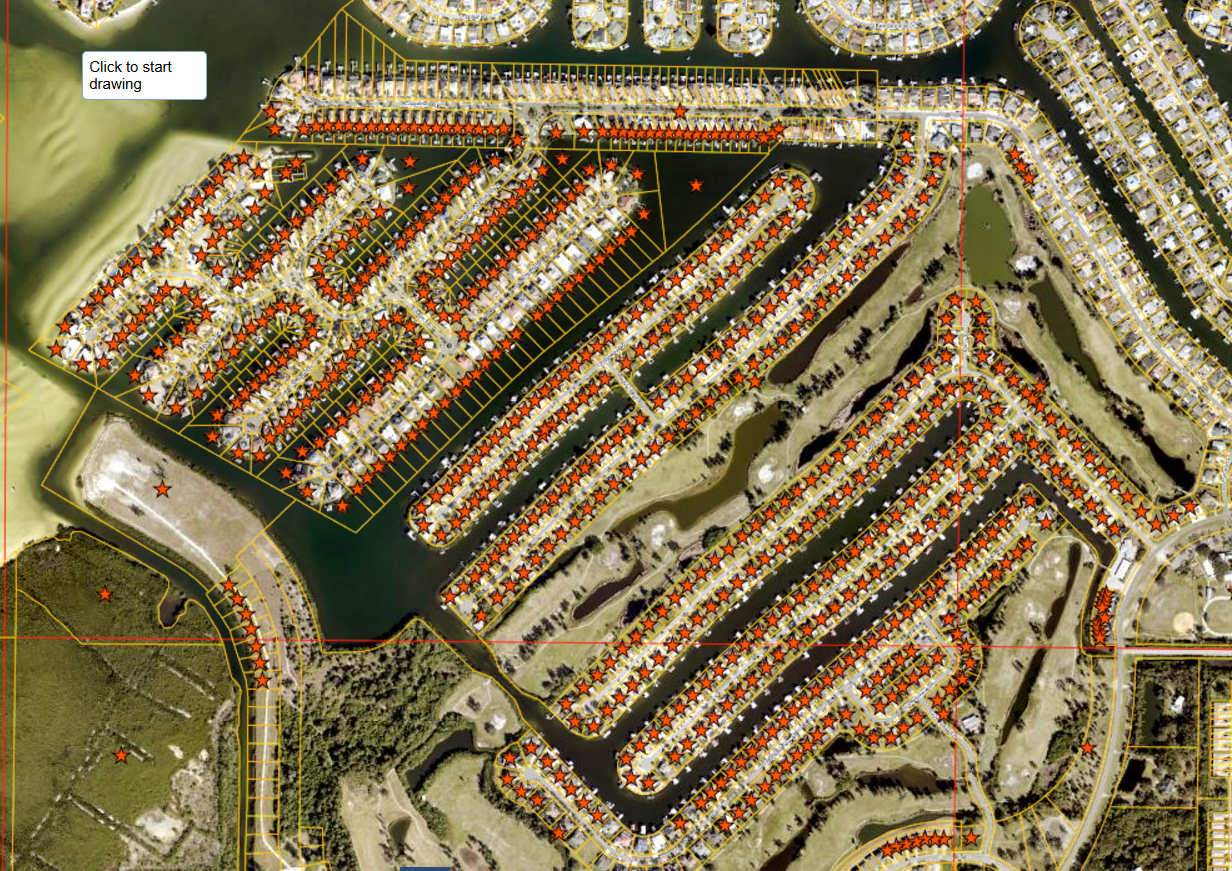

In [188]:
os.chdir('J:/Brainstation/BS Git/Property Records')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'J:/Brainstation/BS Git/Property Records'

In [175]:
x=os.listdir()

In [176]:
AB_1=pd.read_csv('AB_1.csv')
AB_2=pd.read_csv('AB_BLVD_SPIT_1.csv')
AB_3=pd.read_csv('AB_Central_1.csv')
AB_4=pd.read_csv('AB_INTSXN_1.csv')
AB_5=pd.read_csv('AB_SOUTH_1.csv')
AB_6=pd.read_csv('AB_SOUTH_2.csv')
AB_7=pd.read_csv('AB_SPIT_1.csv')
GIB_8=pd.read_csv('GIB_MAIN_1.csv')

In [177]:
RIV_1=pd.read_csv('RIV_W_1.csv')

In [178]:
os.chdir('J:/Brainstation/Capstone Git/Property Records')

In [179]:
AB_1.head(2)

Strap              Owner HomesteadFlag  UseCode  \
0  U-17-31-19-1T4-000000-00011.0    PARSONS AARON A             Y        1   
1  U-18-32-19-ZZZ-000001-79190.0  RIVERSIDE MHP LLC             N       28   

                    UseDescription  TotAcres           PropAddress  \
0   0100 - Single Family Residence      0.28  6607 Dolphin Cove Dr   
1  2814 - Parking lots commercial       3.01        1501 Susie Cir   

       PropCity  PropZip            MailAddress      MailCity MailState  \
0  Apollo Beach  33572.0  6607 DOLPHIN COVE DR   APOLLO BEACH        FL   
1        Ruskin  33570.0  312 SAVANNAH OAKS PL        SEFFNER        FL   

  MailZip   LandVal  TotalExemptions            LastSaleDate  LastSalePrice  \
0   33572  203700.0         104435.0  10/10/2018 12:00:00 AM       504000.0   
1   33584  682667.0              0.0    4/2/2021 12:00:00 AM      1095000.0   

      AppVal     AssVal Zoning TownShip  Section Range SubDivision   Block  \
0   674590.0   402525.0     PD      31S     17.0   19E         1T4  000000   
1  1382400.0  1382400.0  RSC-6      32S     18.0   19E         ZZZ  000001   

       Lot     AltKey  BldgQual  NumBath  NumBed  NumBldgs  YearBuilt  \
0  00011.0  520915022       3.0        3       5         1       1987   
1  79190.0  576610000       3.0        5       4         8       1966   

   BldgCost  SqrFoot  HtdSqrFoot  Neighborhood   CensusTract        Lat  \
0  256523.0     3958        2882        227006  1.205701e+11  27.780714   
1   80946.0     3826        3412        227001  1.205701e+11  27.703499   

         Lng  
0 -82.417778  
1 -82.446503

In [180]:
AB_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Strap                    1000 non-null   object 
 1   Folio                    1000 non-null   int64  
 2   PIN                      1000 non-null   object 
 3   PropertyType             912 non-null    object 
 4   Owner1                   1000 non-null   object 
 5   Owner2                   515 non-null    object 
 6   MailingAddress1          1000 non-null   object 
 7   MailingAddress2          33 non-null     object 
 8   MailingCity              999 non-null    object 
 9   MailingState             1000 non-null   object 
 10  MailingZip               994 non-null    object 
 11  MailingCountry           6 non-null      object 
 12  SiteAddress              971 non-null    object 
 13  SiteCity                 997 non-null    object 
 14  SiteZip                  

In [181]:
dflist=[
AB_1,
AB_2,
AB_3,
AB_4,
AB_5,
AB_6,
AB_7,
GIB_8,
RIV_1]

In [182]:
dfprop=pd.DataFrame(data=AB_2)

In [190]:
# Combine all sections of property data
# dfprop = 'Dataframe: Property'
for x in dflist:
    print(x.shape)
    dfprop=pd.concat([dfprop,x],axis=0)

(500, 39)
(1000, 45)
(1000, 45)
(121, 45)
(1000, 45)
(660, 45)
(505, 45)
(1000, 45)
(1000, 45)


In [184]:
dfprop1=dfprop.copy()

In [185]:
dfprop.head(5)

Strap         Folio                            PIN  \
0  1931151SF000000009000U  5.155500e+08  U-15-31-19-1SF-000000-00900.0   
1  193116ZZZ000001745900U  5.166100e+08  U-16-31-19-ZZZ-000001-74590.0   
2  193120ZZZ000001751101U  2.900000e+09  U-20-31-19-ZZZ-000001-75110.1   
3  1931211SF000000560000U  5.156202e+08  U-21-31-19-1SF-000000-56000.0   
4  1931211SF000000562002U  5.156206e+08  U-21-31-19-1SF-000000-56200.2   

                     PropertyType                               Owner1 Owner2  \
0                             NaN               TAMPA ELECTRIC COMPANY    NaN   
1  MANUFACTURED HOME (AYB > 1976)                    TAMPA ELECTRIC CO    NaN   
2                             NaN                         PUBLIC LANDS    NaN   
3                          SCHOOL  SCHOOL BOARD OF HILLSBOROUGH COUNTY    NaN   
4                             NaN                  HILLSBOROUGH COUNTY    NaN   

                        MailingAddress1     MailingAddress2 MailingCity  \
0                            PO BOX 111                 NaN       TAMPA   
1  THE FLORIDA AQUARIUM ATTN THOM STORK  701 CHANNELSIDE DR       TAMPA   
2                               UNKNOWN                 NaN         NaN   
3        APOLLO BEACH ELEMENTARY SCHOOL  901 E KENNEDY BLVD       TAMPA   
4                      REAL ESTATE DEPT         PO BOX 1110       TAMPA   

  MailingState  MailingZip MailingCountry            SiteAddress  \
0           FL  33601-0111            NaN                      1   
1           FL  33602-5600            NaN        6650 DICKMAN RD   
2                      NaN            NaN                    NaN   
3           FL  33602-3597            NaN  501 APOLLO BEACH BLVD   
4           FL  33601-1110            NaN        504 ELSBERRY RD   

       SiteCity  SiteZip  Acreage Homestead  \
0  APOLLO BEACH  33572.0    41.89        No   
1  APOLLO BEACH  33572.0    19.51        No   
2  APOLLO BEACH  33572.0   110.66        No   
3  APOLLO BEACH  33572.0    14.82        No   
4  APOLLO BEACH  33572.0     0.17        No   

                                              Legal1  \
0  RUSKIN TOMATO FARMS LOT 15 LESS E 360.27 FT AN...   
1  COM AT SE COR OF SEC 16 N 89 DEG 24 MIN 10 SEC...   
2  APOLLO BEACH SUB FLAMINGO CANAL AND OTHER CANA...   
3  RUSKIN TOMATO FARMS THAT PT OF TRS 20 & 27 DES...   
4  RUSKIN TOMATO FARMS W 71 FT OF E 91 FT OF N 10...   

                                              Legal2  \
0  1/2 OF CLOSED R/W FOR NOONAN RD ABUTTING THERE...   
1  0 FT N 00 DEG 32 MIN 38 SEC E 30 FT FOR POB N ...   
2  B 34-41, PB 34-40, PB34-98, PB 35-41, PB 35-98...   
3   BEG 261.88 FT S & 50 FT W OF NE COR OR NE 1/4...   
4                                          OF LOT 20   

                                              Legal3  \
0   1/2 OF LOT 14 LESS W 524.90 FT THEREOF AND TH...   
1  EG 24 MIN 10 SEC W 1235.13 FT N 00 DEG 45 MIN ...   
2   44-90, PB 42-7, PB 37-79 SECTION 20, 21 AND 2...   
3  UN S 1123.15 FT TO N BDRY OF APOLLO BEACH BLVD...   
4                                                NaN   

                                              Legal4          Subdivision  \
0   1/2 OF CLOSED R/W FOR NOONAN RD ABUTTING THEREON  RUSKIN TOMATO FARMS   
1  SEC E 702.42 FT N 88 DEG 48 MIN 46 SEC E 140.7...            UNPLATTED   
2                                                -19            UNPLATTED   
3       81.15 FT N 1125.33 FT AND E 581.15 FT TO BEG  RUSKIN TOMATO FARMS   
4                                                NaN  RUSKIN TOMATO FARMS   

            Neighborhood     TaxDistrict Municipality  TotalNumBuildings  \
0  Apollo Beach Area # 2  UNINCORPORATED            U                0.0   
1  Apollo Beach Area # 2  UNINCORPORATED            U                5.0   
2  Apollo Beach Area # 2  UNINCORPORATED            U                0.0   
3  Apollo Beach Area # 2  UNINCORPORATED            U                1.0   
4  Apollo Beach Area # 2  UNINCORPORATED            U                0.0   

   TotalUnits 

In [186]:
dfprop.shape

(7786, 79)

In [187]:
AB_1.head(1)

Strap            Owner HomesteadFlag  UseCode  \
0  U-17-31-19-1T4-000000-00011.0  PARSONS AARON A             Y        1   

                   UseDescription  TotAcres           PropAddress  \
0  0100 - Single Family Residence      0.28  6607 Dolphin Cove Dr   

       PropCity  PropZip            MailAddress      MailCity MailState  \
0  Apollo Beach  33572.0  6607 DOLPHIN COVE DR   APOLLO BEACH        FL   

  MailZip   LandVal  TotalExemptions            LastSaleDate  LastSalePrice  \
0   33572  203700.0         104435.0  10/10/2018 12:00:00 AM       504000.0   

     AppVal    AssVal Zoning TownShip  Section Range SubDivision   Block  \
0  674590.0  402525.0     PD      31S     17.0   19E         1T4  000000   

       Lot     AltKey  BldgQual  NumBath  NumBed  NumBldgs  YearBuilt  \
0  00011.0  520915022       3.0        3       5         1       1987   

   BldgCost  SqrFoot  HtdSqrFoot  Neighborhood   CensusTract        Lat  \
0  256523.0     3958        2882        227006  1.205701e+11  27.780714   

         Lng  
0 -82.417778

In [151]:
AB_2.head(1)

Strap      Folio                            PIN  \
0  1931151SF000000009000U  515550000  U-15-31-19-1SF-000000-00900.0   

  PropertyType                  Owner1 Owner2 MailingAddress1 MailingAddress2  \
0          NaN  TAMPA ELECTRIC COMPANY    NaN      PO BOX 111             NaN   

  MailingCity MailingState  MailingZip MailingCountry SiteAddress  \
0       TAMPA           FL  33601-0111            NaN           1   

       SiteCity  SiteZip  Acreage Homestead  \
0  APOLLO BEACH  33572.0    41.89        No   

                                              Legal1  \
0  RUSKIN TOMATO FARMS LOT 15 LESS E 360.27 FT AN...   

                                              Legal2  \
0  1/2 OF CLOSED R/W FOR NOONAN RD ABUTTING THERE...   

                                              Legal3  \
0   1/2 OF LOT 14 LESS W 524.90 FT THEREOF AND TH...   

                                             Legal4          Subdivision  \
0  1/2 OF CLOSED R/W FOR NOONAN RD ABUTTING THEREON  RUSKIN TOMATO FARMS   

            Neighborhood     TaxDistrict Municipality  TotalNumBuildings  \
0  Apollo Beach Area # 2  UNINCORPORATED            U                  0   

   TotalUnits  TotalStories  TotalBedrooms  TotalBathrooms  YearBuilt  \
0         0.0           0.0            0.0             0.0          0   

   TotalLandValue  TotalLandValue1  TotalBuildingValue  \
0         1506200          1506200                   0   

   TotalExtraFeaturesValue  TotalHeatedAreaSqFt  TotalGrossAreaSqFt  \
0                        0                    0                   0   

   JustValue  AssessedValue  TaxableValue LastSaleDate  LastSalePrice  \
0    1506200        1458728       1458728   2016-10-25        6720000   

  VacantImproved    Qualified  Unnamed: 44  
0         Vacant  Unqualified          NaN

In [152]:
AB_3.head(3)

Strap      Folio                            PIN  \
0  193109ZZZ000001736500U  514610000  U-09-31-19-ZZZ-000001-73650.0   
1  193114ZZZ000001743500U  515310000  U-14-31-19-ZZZ-000001-74350.0   
2  1931151SF000000003000U  515410000  U-15-31-19-1SF-000000-00300.0   

          PropertyType                Owner1 Owner2  \
0       PREFAB MTL BLD     TAMPA ELECTRIC CO    NaN   
1        WRHSE DISTRIB  FUTERNICK ASSOCIATES    NaN   
2  SERVICE/REPAIR SHOP     TAMPA ELECTRIC CO    NaN   

              MailingAddress1 MailingAddress2   MailingCity MailingState  \
0   TECO ENERGY CORP TAX DEPT      PO BOX 111         TAMPA           FL   
1  1430 S DIXIE HWY UNIT 1226             NaN  CORAL GABLES           FL   
2   TECO ENERGY CORP TAX DEPT      PO BOX 111         TAMPA           FL   

   MailingZip MailingCountry      SiteAddress      SiteCity     SiteZip  \
0  33601-0111            NaN  603 BIG BEND RD     GIBSONTON       33534   
1  33146-3176            NaN     6861N 41 HWY  APOLLO BEACH  33572-       
2  33601-0111            NaN  490 BIG BEND RD  APOLLO BEACH       33572   

   Acreage Homestead                                             Legal1  \
0   416.07        No  9 AND 10 31 19 FRAC N 1/2 SEC 9 AND WLY EXT TH...   
1    13.92        No  THAT PART OF NW 1/4 OF SW 1/4 DESC AS : BEG AT...   
2   136.96        No  RUSKIN TOMATO FARMS LOT 3 LESS E 450 FT AND LE...   

                                              Legal2  \
0  F DESC AS BEG AT INTERS OF E AND W 1/4 LINE WI...   
1  ER OF WLY R/W LINE OF ACL RR AND E BDRY LINE O...   
2   90 FT ... LOT 4 LESS N 90 FT ... LOT 6 LESS N...   

                                              Legal3  \
0   SEC BDRY AND RUN W ALONG 1/4 SEC LINE AND ITS...   
1   23 AND RUN N 28 DEG 36 MIN 28 SEC E ALONG RR ...   
2                           FT OF E 450 FT ... LOT 7   

                                              Legal4          Subdivision  \
0   EXT 3960 FT N 2636.19 FT TO PT ON WLY PROJECT...            UNPLATTED   
1  .75 FT N 89 DEG 32 MIN 36 SEC W 704.83 FT N 84...            UNPLATTED   
2                                                NaN  RUSKIN TOMATO FARMS   

                Neighborhood     TaxDistrict Municipality  TotalNumBuildings  \
0  Gibsonton Area S of River  UNINCORPORATED            U                 38   
1      Apollo Beach Area # 2  UNINCORPORATED            U                  2   
2      Apollo Beach Area # 2  UNINCORPORATED            U                  1   

   TotalUnits  TotalStories  TotalBedrooms  TotalBathrooms  YearBuilt  \
0       167.0          50.0            0.0             0.0       1985   
1         2.0           2.0            0.0             0.0       2019   
2         0.0           1.0            0.0             0.0       1960   

   TotalLandValue  TotalLandValue1  TotalBuildingValue  \
0        12773011         12773011            31474408   
1         1688906          1688906             9551460   
2         5868642          5868642               78204   

   TotalExtraFeaturesValue  TotalHeatedAreaSqFt  TotalGrossAreaSqFt  \
0                 10257988               593167              624374   
1                   623000                86761               91823   
2                    31098                 4071                4071   

   JustValue  AssessedValue  TaxableValue LastSaleDate  LastSalePrice  \
0   54505407       54505407      54505407   1981-12-01            100   
1    7578800        7578800       7578800   2017-08-25        2662500   
2    5977944        5977944       5977944   1982-02-01         430500   

  VacantImproved    Qualified  Unnamed: 44  
0            NaN  Unqualified          NaN  
1         Vacant  Unqualified          NaN  
2       Improved  Unqualified          NaN

In [153]:
dfprop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7786 entries, 0 to 999
Data columns (total 79 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Strap                    7786 non-null   object 
 1   Folio                    7286 non-null   float64
 2   PIN                      7286 non-null   object 
 3   PropertyType             6229 non-null   object 
 4   Owner1                   7286 non-null   object 
 5   Owner2                   3635 non-null   object 
 6   MailingAddress1          7286 non-null   object 
 7   MailingAddress2          331 non-null    object 
 8   MailingCity              7280 non-null   object 
 9   MailingState             7286 non-null   object 
 10  MailingZip               7248 non-null   object 
 11  MailingCountry           41 non-null     object 
 12  SiteAddress              6990 non-null   object 
 13  SiteCity                 7261 non-null   object 
 14  SiteZip                  7258 

In [154]:
"""
Columns for Selection Pressure analysis

3,
8,
14,
15,
25,
26,
30,
36,
40,
42

"""

'\nColumns for Selection Pressure analysis\n\n3,\n8,\n14,\n15,\n25,\n26,\n30,\n36,\n40,\n42\n\n'

In [155]:
dfprop.drop_duplicates(inplace=True)

In [156]:
dfprop=dfprop[dfprop.columns[[0,3,13,14,15,25,27,30,36,40,42]]]

In [157]:
RIV_1=RIV_1[RIV_1.columns[[0,3,13,14,15,25,27,30,36,40,42]]]

In [158]:
RIV_1.shape

(1000, 11)

In [159]:
dfprop.shape

(6358, 11)

In [160]:
dfprop1

Strap         Folio                            PIN  \
0    1931151SF000000009000U  5.155500e+08  U-15-31-19-1SF-000000-00900.0   
1    193116ZZZ000001745900U  5.166100e+08  U-16-31-19-ZZZ-000001-74590.0   
2    193120ZZZ000001751101U  2.900000e+09  U-20-31-19-ZZZ-000001-75110.1   
3    1931211SF000000560000U  5.156202e+08  U-21-31-19-1SF-000000-56000.0   
4    1931211SF000000562002U  5.156206e+08  U-21-31-19-1SF-000000-56200.2   
..                      ...           ...                            ...   
995  1930231R1000000000088U  4.946100e+08  U-23-30-19-1R1-000000-00008.8   
996  1930231R100000000008AU  4.946200e+08  U-23-30-19-1R1-000000-00008.A   
997  193023ZZZ000001698600U  4.931100e+08  U-23-30-19-ZZZ-000001-69860.0   
998  193023ZZZ000001698800U  4.931400e+08  U-23-30-19-ZZZ-000001-69880.0   
999  193031ZZZ000000000200U  4.928861e+08  U-31-30-19-ZZZ-000000-00020.0   

                       PropertyType                               Owner1  \
0                               NaN               TAMPA ELECTRIC COMPANY   
1    MANUFACTURED HOME (AYB > 1976)                    TAMPA ELECTRIC CO   
2                               NaN                         PUBLIC LANDS   
3                            SCHOOL  SCHOOL BOARD OF HILLSBOROUGH COUNTY   
4                               NaN                  HILLSBOROUGH COUNTY   
..                              ...                                  ...   
995  MANUFACTURED HOME (AYB > 1976)              RIVERA ANTONIA GONZALEZ   
996  MANUFACTURED HOME (AYB > 1976)                     GARCIA TIMOTHY A   
997                             NaN                MOSAIC FERTILIZER LLC   
998                             NaN               DEPT OF TRANSPORTATION   
999                             NaN                 TAMPA PORT AUTHORITY   

                          Owner2                       MailingAddress1  \
0                            NaN                            PO BOX 111   
1                            NaN  THE FLORIDA AQUARIUM ATTN THOM STORK   
2                            NaN                               UNKNOWN   
3                            NaN        APOLLO BEACH ELEMENTARY SCHOOL   
4                            NaN                      REAL ESTATE DEPT   
..                           ...                                   ...   
995  LANDAVERDE ROBERTO ESPINOSA                           PO BOX 6201   
996                          NaN                     6705 RIVERVIEW DR   
997                          NaN           101 E KENNEDY BLVD STE 2500   
998                          NaN                     11201 MCKINLEY DR   
999                          NaN           1101 CHANNELSIDE DR STE 400   

        MailingAddress2      MailingCity MailingState  MailingZip  \
0                   NaN            TAMPA           FL  33601-0111   
1    701 CHANNELSIDE DR            TAMPA           FL  33602-5600   
2                   NaN              NaN                      NaN   
3    901 E KENNEDY BLVD            TAMPA           FL  33602-3597   
4           PO BOX 1110            TAMPA           FL  33601-1110   
..                  ...              ...          ...         ...   
995                 NaN  SUN CITY CENTER           FL  33571-6201   
996                 NaN        RIVERVIEW           FL  33578-4846   
997                 NaN            TAMPA           FL  33602-3650   
998                 NaN            TAMPA           FL  33612-6456   
999                 NaN            TAMPA           FL  33602-3609   

    MailingCountry            SiteAddress      SiteCity  SiteZip  Acreage  \
0              NaN                      1  APOLLO BEACH  33572.0    41.89   
1              NaN        6650 DICKMAN RD  APOLLO BEACH  33572.0    19.51   
2              NaN                    NaN  APOLLO BEACH  33572.0   110.66   
3              NaN  501 APOLLO BEACH BLVD  APOLLO BEACH  33572.0    14.82   
4              NaN        504 ELSBERRY RD  APOLLO BEACH  33572.0     0.17   
..             .

In [161]:
dfprop=pd.concat([dfprop,RIV_1])

In [162]:
dfprop.isna().sum()

Strap                    0
PropertyType          1676
SiteCity               522
SiteZip                523
Acreage                500
TotalNumBuildings      500
TotalStories           500
YearBuilt                0
TotalGrossAreaSqFt     500
LastSaleDate           164
VacantImproved         818
dtype: int64

In [191]:
# To be consildated into higher aggregate categories: Residential, Commercial, Industrial, Other
dfprop.PropertyType.value_counts()

PropertyType
SINGLE FAMILY                     10799
MANUFACTURED HOME (AYB > 1976)     2373
TOWNHOUSE                          1403
MOBILE HOME (AYB < 1977)            859
CONDOMINIUM                         333
OFFICE <3 STORY                     164
COMM/CONDO 2                        110
PREFAB MTL BLD                       96
DUPLEX/TRIPLEX/QUADPLX/ETC           79
WRHSE - STORAGE                      75
RETAIL STRIP CENTER                  72
NOT CALCULATING                      61
CLUBHOUSE                            59
AUTO SERVICE/REPAIR GARAGE           39
STORE RETAIL                         37
CONVENIENCE STORE                    33
MEDICAL OFFICE                       25
WRHSE DISTRIB                        24
MFG LIGHT                            22
APARTMENT <4 STORY                   19
RESTAURANT                           19
SERVICE/REPAIR SHOP                  18
MODULAR HOME                         18
CHURCH                               15
REST FAST FOOD             

In [192]:
# Slight cleaning of the data
# Some of the grids overlapped so these rows must be accounted for
dfprop.duplicated().value_counts()

True     15000
False     6358
Name: count, dtype: int64

In [193]:
dfprop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21358 entries, 0 to 999
Data columns (total 79 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Strap                    21358 non-null  object 
 1   Folio                    19858 non-null  float64
 2   PIN                      19858 non-null  object 
 3   PropertyType             16863 non-null  object 
 4   Owner1                   19858 non-null  object 
 5   Owner2                   9875 non-null   object 
 6   MailingAddress1          19858 non-null  object 
 7   MailingAddress2          927 non-null    object 
 8   MailingCity              19842 non-null  object 
 9   MailingState             19858 non-null  object 
 10  MailingZip               19756 non-null  object 
 11  MailingCountry           111 non-null    object 
 12  SiteAddress              19028 non-null  object 
 13  SiteCity                 19789 non-null  object 
 14  SiteZip                  1978

In [194]:
dfprop.isna().sum()

Strap               0
Folio            1500
PIN              1500
PropertyType     4495
Owner1           1500
                ...  
SqrFoot         19858
HtdSqrFoot      19858
CensusTract     19876
Lat             19858
Lng             19858
Length: 79, dtype: int64

In [195]:
dfprop.Acreage

0       41.89
1       19.51
2      110.66
3       14.82
4        0.17
        ...  
995      0.21
996      0.59
997      5.28
998      0.84
999    427.38
Name: Acreage, Length: 21358, dtype: float64

In [196]:
dfprop.PropertyType.value_counts()

PropertyType
SINGLE FAMILY                     10799
MANUFACTURED HOME (AYB > 1976)     2373
TOWNHOUSE                          1403
MOBILE HOME (AYB < 1977)            859
CONDOMINIUM                         333
OFFICE <3 STORY                     164
COMM/CONDO 2                        110
PREFAB MTL BLD                       96
DUPLEX/TRIPLEX/QUADPLX/ETC           79
WRHSE - STORAGE                      75
RETAIL STRIP CENTER                  72
NOT CALCULATING                      61
CLUBHOUSE                            59
AUTO SERVICE/REPAIR GARAGE           39
STORE RETAIL                         37
CONVENIENCE STORE                    33
MEDICAL OFFICE                       25
WRHSE DISTRIB                        24
MFG LIGHT                            22
APARTMENT <4 STORY                   19
RESTAURANT                           19
SERVICE/REPAIR SHOP                  18
MODULAR HOME                         18
CHURCH                               15
REST FAST FOOD             

In [197]:
dfprop.PropertyType.isna().sum()

4495

In [198]:
dfprop.PropertyType.fillna('undefined',inplace=True)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_55644\2890697567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfprop.PropertyType.fillna('undefined',inplace=True)


In [199]:
dfprop.duplicated().sum()

15000

In [207]:
# Get rid of redundant data rows|
dfprop.drop_duplicates(inplace=True)

In [208]:
dfprop.isna().sum()

Strap              0
Folio            500
PIN              500
PropertyType       0
Owner1           500
                ... 
SqrFoot         5858
HtdSqrFoot      5858
CensusTract     5864
Lat             5858
Lng             5858
Length: 79, dtype: int64

In [209]:
dfprop.duplicated().value_counts()

False    6358
Name: count, dtype: int64

In [221]:
dfprop[dfprop.SiteCity.isna()==True]

Strap        Folio  \
994         193122C6N000000000010U  539650622.0   
995         193122C6N000000000020U  539650624.0   
996         193122C6N000000000030U  539650626.0   
0    U-17-31-19-1T4-000000-00011.0          NaN   
1    U-18-32-19-ZZZ-000001-79190.0          NaN   
..                             ...          ...   
404         192922ZZZ000001494603U  434920030.0   
405         192922ZZZ000001494605U  434920050.0   
406         192922ZZZ000001494607U  434920070.0   
583         192927663000001589701U  463880005.0   
808         1929331Q2000005000025U  468160005.0   

                               PIN    PropertyType  \
994  U-22-31-19-C6N-000000-00001.0  REST FAST FOOD   
995  U-22-31-19-C6N-000000-00002.0  MEDICAL OFFICE   
996  U-22-31-19-C6N-000000-00003.0  MEDICAL OFFICE   
0                              NaN       undefined   
1                              NaN       undefined   
..                             ...             ...   
404  U-22-29-19-ZZZ-000001-49460.3       undefined   
405  U-22-29-19-ZZZ-000001-49460.5       undefined   
406  U-22-29-19-ZZZ-000001-49460.7       undefined   
583  U-27-29-19-663-000001-58970.1       undefined   
808  U-33-29-19-1Q2-000005-00002.5       undefined   

                                 Owner1                      Owner2  \
994                S B APOLLO BEACH LLC                         NaN   
995  FARMINGTON AVENUE REALTY GROUP LLC  LUBLIN ASSOCIATES NO 2 LLC   
996            BW APOLLO VENTURE II LLC                         NaN   
0                                   NaN                         NaN   
1                                   NaN                         NaN   
..                                  ...                         ...   
404                    RICHARDS DOUGLAS               RICHARDS ELSA   
405                    RICHARDS DOUGLAS               RICHARDS ELSA   
406                    RICHARDS DOUGLAS               RICHARDS ELSA   
583                     HERNANDEZ HARRY        GALY IGNACTIO ROMERO   
808              DEPT OF TRANSPORTATION                         NaN   

            MailingAddress1    MailingAddress2         MailingCity  \
994            405 18TH AVE                NaN  INDIAN ROCKS BEACH   
995   1237 GORDON RIVER TRL                NaN              NAPLES   
996  ATTN: ACCOUNTS PAYABLE  3301 W GANDY BLVD               TAMPA   
0                       NaN                NaN                 NaN   
1                       NaN                NaN                 NaN   
..                      ...                ...                 ...   
404          1820 N 57TH ST                NaN               TAMPA   
405          1820 N 57TH ST                NaN               TAMPA   
406          1820 N 57TH ST                NaN               TAMPA   
583         5404 24TH AVE S                NaN               TAMPA   
808       11201 MCKINLEY DR                NaN               TAMPA   

    MailingState  MailingZip MailingCountry          SiteAddress SiteCity  \
994           FL       33785            NaN  6184N US HIGHWAY 41      NaN   
995           FL       34105            NaN      6182N US 41 HWY      NaN   
996           FL  33611-                NaN      6182N US 41 HWY      NaN   
0            NaN         NaN            NaN                  NaN      NaN   
1            NaN         NaN            NaN                  NaN      NaN   
..           ...         ...            ...                  ...      ...   
404           FL  33619-3116            NaN                  NaN      NaN   
405           FL  33619-3116            NaN                  NaN      NaN   
406           FL  33619-3116            NaN                  NaN      NaN   
583           FL  33619-5369            NaN       5404S 24TH AVE      NaN   
808           FL  33612-6456            NaN                  NaN      NaN   

    SiteZip  Acreage Homestead  \
994     NaN     0.84        No   
995     NaN     0.70        No   
996     NaN     0.69        No   
0       NaN 

In [211]:
dfprop[dfprop.VacantImproved.isna() & dfprop.YearBuilt>0]

Strap        Folio  \
35          1931211TM000001000220U  531990000.0   
85          1931211TM000006000090U  533250000.0   
113         1931211TM000017000280U  536700000.0   
115         1931211TM000017000300U  536720000.0   
0    U-17-31-19-1T4-000000-00011.0          NaN   
..                             ...          ...   
895         193003663000001671901U  489360200.0   
910         193004ZZZ000001672102U  489450030.0   
915         193004ZZZ000001672300U  489450010.0   
932         193005ZZZ000005818120U  489450600.0   
951         193010ZZZ000001679700U  490260000.0   

                               PIN                    PropertyType  \
35   U-21-31-19-1TM-000001-00022.0                   SINGLE FAMILY   
85   U-21-31-19-1TM-000006-00009.0                   SINGLE FAMILY   
113  U-21-31-19-1TM-000017-00028.0                   SINGLE FAMILY   
115  U-21-31-19-1TM-000017-00030.0                   SINGLE FAMILY   
0                              NaN                       undefined   
..                             ...                             ...   
895  U-03-30-19-663-000001-67190.1                   WRHSE DISTRIB   
910  U-04-30-19-ZZZ-000001-67210.2                  PREFAB MTL BLD   
915  U-04-30-19-ZZZ-000001-67230.0  MANUFACTURED HOME (AYB > 1976)   
932  U-05-30-19-ZZZ-000005-81812.0                  PREFAB MTL BLD   
951  U-10-30-19-ZZZ-000001-67970.0                  PREFAB MTL BLD   

                        Owner1                    Owner2  \
35                EDGAR DALE S                       NaN   
85            BARBER CYNTHIA J                       NaN   
113      TIPPINS HENRY TRUSTEE  TIPPINS PATRICIA TRUSTEE   
115       WETZEL DEBORAH LYNNE                       NaN   
0                          NaN                       NaN   
..                         ...                       ...   
895       HIM TAMPA REALTY LLC                       NaN   
910       TAMPA PORT AUTHORITY                       NaN   
915       TAMPA PORT AUTHORITY                       NaN   
932       TAMPA PORT AUTHORITY                       NaN   
951  CARMEUSE LIME & STONE INC                       NaN   

                       MailingAddress1              MailingAddress2  \
35                     457 FLAMINGO DR                          NaN   
85                      477 FAIRFAX LN                          NaN   
113              3430 W SHELL POINT RD                          NaN   
115                  521 FLORIDA CIR N                          NaN   
0                                  NaN                          NaN   
..                                 ...                          ...   
895          C/O CHARMER SUNBELT GROUP        60 E 42ND ST STE 1915   
910       C/O GAETANO-CIACCTORE CEMENT  1101 CHANNELSIDE DR STE 400   
915                               YARA  1101 CHANNELSIDE DR STE 400   
932        C/O INDIRECT TAX DEPARTMENT         1200 URBAN CENTER DR   
951  6920 POINTE INVERNESS WAY STE 301                          NaN   

      MailingCity MailingState  MailingZip MailingCountry  \
35   APOLLO BEACH           FL  33572-2519            NaN   
85   APOLLO BEACH           FL  33572-2502            NaN   
113        RUSKIN           FL  33570-3031            NaN   
115  APOLLO BEACH           FL  33572-2528            NaN   
0             NaN          NaN         NaN            NaN   
..            ...          ...         ...            ...   
895      NEW YORK           NY  10165-6230            NaN   
910         TAMPA           FL  33602-3609            NaN   
915         TAMPA           FL  33602-3609            NaN   
932      VESTAVIA           AL  35242-2545            NaN   
951    FORT WAYNE           IN  46804-7926            NaN   

               SiteAddress      SiteCity  SiteZip  Acreage Homestead  \
35         457 FLAMINGO DR  APOLLO BEACH  33572.0     0.24       Yes   
85          477 FAIRFAX LN  APOLLO BEACH  33572.0     0.23       Yes   
113       513N FLORIDA CIR  APOLLO BEACH  33572.0   

In [223]:
# not all columns are relevant and their NaN, null or 0 status is not important
dfprop.isna().sum()

Strap              0
Folio            500
PIN              500
PropertyType       0
Owner1           500
                ... 
SqrFoot         5858
HtdSqrFoot      5858
CensusTract     5864
Lat             5858
Lng             5858
Length: 79, dtype: int64

In [224]:
# Improved plots that have been misclassified
dfprop[dfprop.VacantImproved.isna() & dfprop.YearBuilt>0].VacantImproved.fillna('Improved',inplace=True)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_55644\1555862745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfprop[dfprop.VacantImproved.isna() & dfprop.YearBuilt>0].VacantImproved.fillna('Improved',inplace=True)


In [225]:
# Looking for common traits - perhaps it speaks to why these properties were misclassified and and relevance
dfprop[dfprop.YearBuilt==0].PropertyType.unique()

array(['undefined', 'CONDOMINIUM', 'TOWNHOUSE'], dtype=object)

Primary features of interest for simple model are Year Built, Acreage, totalGrossAreaSqft.

Understanding the relationship between development per property and population density and growth will be a calculated feature used in the construction of the HII-aquatic index.

### Housing, Population Density and Change

The impact of coastal development extends beyond the shoreline. In an estuarine environment, the watersheds that feed into the estuary (or in the case the bay) are equally important. Using a highway as a physical boundary overlapped with a map of the various watersheds, a representative set of properties, the type, their acreage and the year that they were built will be used as an estimate and proxy for coastline development.  Based on research literature, concentration of non-organic nitrates and phosphates will serve as a proxy for the introduction of artificial damaging compounds - however, in the construction of more complex models, more granular data can be used.

In [226]:
## New Construction estimates by year

In [227]:
dfprop.head(1)

Strap        Folio                            PIN  \
0  1931151SF000000009000U  515550000.0  U-15-31-19-1SF-000000-00900.0   

  PropertyType                  Owner1 Owner2 MailingAddress1 MailingAddress2  \
0    undefined  TAMPA ELECTRIC COMPANY    NaN      PO BOX 111             NaN   

  MailingCity MailingState  MailingZip MailingCountry SiteAddress  \
0       TAMPA           FL  33601-0111            NaN           1   

       SiteCity  SiteZip  Acreage Homestead  \
0  APOLLO BEACH  33572.0    41.89        No   

                                              Legal1  \
0  RUSKIN TOMATO FARMS LOT 15 LESS E 360.27 FT AN...   

                                              Legal2  \
0  1/2 OF CLOSED R/W FOR NOONAN RD ABUTTING THERE...   

                                              Legal3  \
0   1/2 OF LOT 14 LESS W 524.90 FT THEREOF AND TH...   

                                             Legal4          Subdivision  \
0  1/2 OF CLOSED R/W FOR NOONAN RD ABUTTING THEREON  RUSKIN TOMATO FARMS   

            Neighborhood     TaxDistrict Municipality  TotalNumBuildings  \
0  Apollo Beach Area # 2  UNINCORPORATED            U                0.0   

   TotalUnits  TotalStories  TotalBedrooms  TotalBathrooms  YearBuilt  \
0         0.0           0.0            0.0             0.0          0   

   TotalLandValue  TotalLandValue1  TotalBuildingValue  \
0       1506200.0        1506200.0                 0.0   

   TotalExtraFeaturesValue  TotalHeatedAreaSqFt  TotalGrossAreaSqFt  \
0                      0.0                  0.0                 0.0   

   JustValue  AssessedValue  TaxableValue LastSaleDate  LastSalePrice  \
0  1506200.0      1458728.0     1458728.0   2016-10-25      6720000.0   

  VacantImproved    Qualified  Unnamed: 44 Owner HomesteadFlag  UseCode  \
0         Vacant  Unqualified          NaN   NaN           NaN      NaN   

  UseDescription  TotAcres PropAddress PropCity  PropZip MailAddress MailCity  \
0            NaN       NaN         NaN      NaN      NaN         NaN      NaN   

  MailState MailZip  LandVal  TotalExemptions  AppVal  AssVal Zoning TownShip  \
0       NaN     NaN      NaN              NaN     NaN     NaN    NaN      NaN   

   Section Range SubDivision Block  Lot  AltKey  BldgQual  NumBath  NumBed  \
0      NaN   NaN         NaN   NaN  NaN     NaN       NaN      NaN     NaN   

   NumBldgs  BldgCost  SqrFoot  HtdSqrFoot  CensusTract  Lat  Lng  
0       NaN       NaN      NaN         NaN          NaN  NaN  NaN

In [228]:
dfprop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6358 entries, 0 to 999
Data columns (total 79 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Strap                    6358 non-null   object 
 1   Folio                    5858 non-null   float64
 2   PIN                      5858 non-null   object 
 3   PropertyType             6358 non-null   object 
 4   Owner1                   5858 non-null   object 
 5   Owner2                   2851 non-null   object 
 6   MailingAddress1          5858 non-null   object 
 7   MailingAddress2          272 non-null    object 
 8   MailingCity              5854 non-null   object 
 9   MailingState             5858 non-null   object 
 10  MailingZip               5829 non-null   object 
 11  MailingCountry           33 non-null     object 
 12  SiteAddress              5609 non-null   object 
 13  SiteCity                 5841 non-null   object 
 14  SiteZip                  5840 

In [229]:
dfyearbuilt=dfprop[dfprop.YearBuilt>1988].groupby('YearBuilt').YearBuilt.count()

In [230]:
len(dfyearbuilt)

36

In [231]:
# Get annual change of homes built on hillsborough bay coast from 1990-present
perchange=[]
year=1989
year1=[]
x_base=[]
x1=[]
for x in range(1989,1989+len(dfyearbuilt)):
    if x==0:
        continue
    elif x==1988+len(dfyearbuilt):
        break
    else:
        perchange.append(round((dfyearbuilt[x+1]/dfyearbuilt[x])*100,3))
        x_base.append(dfyearbuilt[x])
        x1.append(dfyearbuilt[x+1])
    year+=1
    year1.append(year)

In [232]:
perchange[0:5]

[91.892, 63.235, 158.14, 135.294, 75.0]

In [233]:
dfperchange=pd.DataFrame()
dfperchange['percentchange']=perchange

In [234]:
dfperchange['x']=x_base
dfperchange['x+1']=x1
dfperchange['year']=year1

In [235]:
dfperchange.head(5)

percentchange   x  x+1  year
0         91.892  74   68  1990
1         63.235  68   43  1991
2        158.140  43   68  1992
3        135.294  68   92  1993
4         75.000  92   69  1994

In [236]:
dfprop.LastSaleDate=pd.to_datetime(dfprop.LastSaleDate)

ValueError: time data "10/10/2018 12:00:00 AM" doesn't match format "%Y-%m-%d", at position 1000. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [240]:
dfperchange=pd.concat([dfperchange,dfperchange_unit.iloc[:,0:3]],axis=1)

NameError: name 'dfperchange_unit' is not defined

In [237]:
dfprop[dfprop.YearBuilt>1989].groupby(['YearBuilt']).TotalNumBuildings.agg(['min', 'max', 'std', 'sum'])

min   max       std    sum
YearBuilt                            
1990       1.0   4.0  0.443977   70.0
1991       1.0   2.0  0.152499   44.0
1992       1.0   1.0  0.000000   64.0
1993       1.0   7.0  0.929039  104.0
1994       1.0   1.0  0.000000   69.0
1995       1.0   1.0  0.000000  103.0
1996       1.0   2.0  0.130734  118.0
1997       1.0   2.0  0.115470   76.0
1998       1.0   3.0  0.294418  107.0
1999       1.0  11.0  1.070100   99.0
2000       1.0   2.0  0.103695   94.0
2001       1.0   1.0  0.000000   70.0
2002       1.0   5.0  0.419314   95.0
2003       1.0   3.0  0.253479   80.0
2004       1.0  17.0  1.315192  164.0
2005       1.0   2.0  0.064018  245.0
2006       1.0   4.0  0.200000  228.0
2007       1.0   3.0  0.177850  192.0
2008       1.0   4.0  0.469030   68.0
2009       1.0   1.0  0.000000   18.0
2010       1.0   2.0  0.242536   18.0
2011       1.0  13.0  3.328201   25.0
2012       1.0   1.0  0.000000   12.0
2013       1.0   1.0  0.000000   39.0
2014       1.0   5.0  0.816119   55.0
2015       1.0   1.0  0.000000   56.0
2016       1.0   1.0  0.000000   19.0
2017       1.0   1.0  0.000000   23.0
2018       1.0   2.0  0.176777   33.0
2019       1.0   2.0  0.238833   36.0
2020       1.0   1.0  0.000000   41.0
2021       1.0   1.0  0.000000   51.0
2022       1.0   1.0  0.000000   85.0
2023       1.0   1.0  0.000000  115.0
2024       1.0   1.0  0.000000   93.0

In [238]:
# Get annual change of Total buildings built on hillsborough bay coast from 1990-present
perchange_build=[]
year_build=1989
year1_build=[]
x_base1=[]
x2=[]
for x in range(1989,1989+len(dftotalunit)):
    if x==0:
        continue
    elif x==1988+len(dfyearbuilt):
        break
    else:
        perchange_build.append(round((dftotalunit[x+1]/dftotalunit[x])*100,3))
        x_base1.append(dftotalunit[x])
        x2.append(dftotalunit[x+1])
    year_build+=1
    year1_build.append(year_build)

NameError: name 'dftotalunit' is not defined

In [239]:
# Describes number of houses built in subset data, total number of units per built structure
# Multi-unit buildings have an increased environmental impact per individual parcel
dfperchange_unit

NameError: name 'dfperchange_unit' is not defined

In [ ]:
##### Population

In [422]:
os.chdir('J:\\Brainstation\\Capstone Git')

In [424]:
dftraffic=pd.read_csv('MaritimeTraffic_TB.csv')

C:\Users\Ajax\AppData\Local\Temp\ipykernel_10352\3424837237.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dftraffic=pd.read_csv('MaritimeTraffic_TB.csv')


In [241]:
##### Current Working Space
## Maritime Traffic may not be taken into consideration, although it certainly plays a role in ecosystem health.
## As the final index will be created as an aggregate index, it can be assess and introduced into the model once created.
## This data presents a problem as it only describes docking behavior - not the passage of the ship's trip.

In [244]:
os.chdir('J:\\Brainstation\\BS Git\\data\\human Imact\\MarineTraffic')

In [245]:
### Looking into population statistics nolw

In [256]:
dfpop_staged=pd.read_csv('StagedPopulations.csv')

In [257]:
dfpop_staged
## This file was originally a geodatabase file that has been read in as a CSV to access the non-geospatial data.

wkt_geom  OBJECTID  SMOD_LEVEL  \
0  MultiPolygon (((-82.72100607199996603 28.37449...     12407          30   
1  MultiPolygon (((-82.41634709599998132 27.71290...    101040          23   
2  MultiPolygon (((-82.37805279399998426 27.81459...    101047          23   
3  MultiPolygon (((-82.33898157599998058 27.82306...    101054          23   
4  MultiPolygon (((-82.21098576599996477 27.84849...    101064          23   

    SMOD_ID  ISO     CNTRY_NAME    JRC_NAME_MAIN  \
0  30_12407  USA  United States            Tampa   
1  23_87924  USA  United States  Sun City Center   
2  23_87931  USA  United States       Adamsville   
3  23_87938  USA  United States        Riverview   
4  23_87948  USA  United States         Fishhawk   

                                       JRC_NAME_LIST  \
0  Tampa; Saint Petersburg; Clearwater; Brandon; ...   
1  Sun City Center; Greater Sun Center; Ruskin; G...   
2             Adamsville; North Ruskin; Apollo Beach   
3                               Riverview; Riverview   
4                                           Fishhawk   

                           CIESIN_NAME                       CIESIN_NAME_TL  \
0                                Tampa                                Tampa   
1  Greater Sun Center, Sun City Center  Greater Sun Center, Sun City Center   
2                         Apollo Beach                         Apollo Beach   
3                        Panther Trace                        Panther Trace   
4                     Parkside Village                     Parkside Village   

     AREA_SQKM      AREA_SQM                      CIESIN_NAME_ADJ  ADJ  \
0  1745.422402  1.745422e+09                                Tampa  0.0   
1    42.796333  4.279633e+07  Greater Sun Center, Sun City Center  NaN   
2    26.476118  2.647612e+07                         Apollo Beach  NaN   
3    17.931987  1.793199e+07                        Panther Trace  NaN   
4     4.980987  4.980987e+06                     Parkside Village  NaN   

  GHSPOP_R19_1975  GHSPOP_R19_1990  GHSPOP_R19_2000  GHSPOP_R19_2015  \
0              F      1.305016e+06     1.714504e+06     1.993365e+06   
1     11163.29545     1.725212e+04     2.122397e+04     2.838951e+04   
2     5564.827307     8.602107e+03     1.090787e+04     1.474059e+04   
3     10059.89708     1.549627e+04     1.960960e+04     2.584830e+04   
4     2865.958633     4.492428e+03     5.881465e+03     7.213995e+03   

   GHSPOP_R23_1975  GHSPOP_R23_1980  GHSPOP_R23_1985  GHSPOP_R23_1990  \
0    980167.207100     1.195809e+06     1.333843e+06     1.480168e+06   
1     12661.218560     1.253746e+04     1.568739e+04     1.837320e+04   
2      6259.350004     6.348697e+03     7.839934e+03     9.115709e+03   
3     10124.148230     1.236164e+04     1.382634e+04     1.547221e+04   
4      3046.078571     3.750538e+03     4.166395e+03     4.651319e+03   

   GHSPOP_R23_1995  GHSPOP_R23_2000  GHSPOP_R23_2005  GHSPOP_R23_2010  \
0     1.601766e+06     1.717621e+06     1.824984e+06     1.920968e+06   
1     2.062473e+04     2.210739e+04     2.713719e+04     2.711277e+04   
2     1.024629e+04     1.101930e+04     1.340539e+04     1.364281e+04   
3     1.716790e+04     1.918479e+04     2.176125e+04     2.414159e+04   
4     5.197914e+03     5.798763e+03     6.694678e+03     7.502811e+03   

   GHSPOP_R23_2015  GHSPOP_R23_2020  GHSPOP_R23_2025  GHSPOP_R23_2030  
0     2.045045e+06     2.191664e+06     2.261370e+06     2.330530e+06  
1     2.903848e+04     3.109123e+04     3.220606e+04     3.357573e+04  
2     1.467739e+04     1.571192e+04     1.632053e+04     1.699778e+04  
3     2.630752e+04     2.811921e+04     2.902663e+04     2.993258e+04  
4     8.249881e+03     8.864453e+03     9.098630e+03     9.350476e+03

In [251]:
dfpop.shape

NameError: name 'dfpop' is not defined

In [252]:
dfpop.info()

NameError: name 'dfpop' is not defined

In [253]:
dfpop.BaseDateTime=pd.to_datetime(dfpop.BaseDateTime)

NameError: name 'dfpop' is not defined

In [254]:
dfpop.isna().sum()

NameError: name 'dfpop' is not defined

In [255]:
ZZZ

NameError: name 'ZZZ' is not defined